## Car  Assignment

- Build a linear model to infer how the price of car varies with independent variables
- steps involved in model
   - 1.Data Exploration
   - 2.Data visualization
   - 3.Data preprocessing
   - 4.Feature selection
   - 5.Model building
   - 6.Residual analysis
   - 7.Model Evaluation

## Data Exploration

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#loading the data
cars=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
cars_df=cars.copy()

In [4]:
#preview the data
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#exploring thr data
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

- The given data has no missing values

In [6]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
cars_df['CarName']

0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

In [8]:
#function to get only carname from CarName columns(having carname model)
def get_carName(car):
    return car.split()[0]

In [9]:
cars_df['carname']=cars_df['CarName'].apply(get_carName)

In [10]:
#function which corrects the miss spelled car names
def correct_carnames(x):
    if x=='toyouta':
        return 'toyota'
    elif x=='Nissan':
        return 'nissan'
    elif (x=='vw') | (x=='vokswagen'):
        return 'volkswagen'
    elif x=='porcshce':
        return 'porsche'
    elif x=='maxda':
        return 'mazda'
    else:
        return x

In [11]:
cars_df['carname']=cars_df['carname'].apply(correct_carnames)

In [12]:
cars_df['carname']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181         toyota
182     volkswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189     volkswagen
190     volkswagen
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

## Data Visualization
- visualizing the categorical variables using box and count plots

In [13]:
#Univariant analysis and segmented analysis

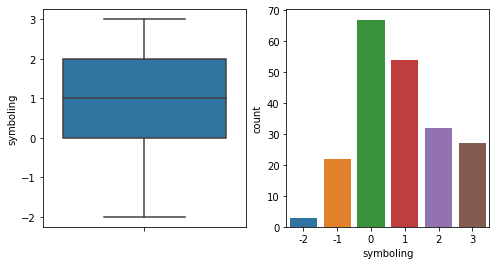

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))
sns.boxplot(cars_df['symboling'],orient='v',ax=ax1)
sns.countplot(cars_df['symboling'],ax=ax2)

In [15]:
#avearge symboling of all caars is around 1

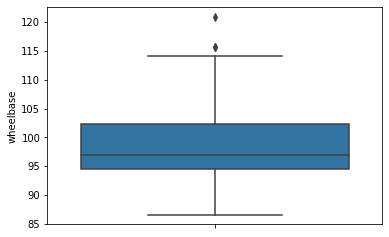

In [16]:
sns.boxplot(cars_df['wheelbase'],orient='v')

In [17]:
#average wheelbase of all cars is around 96

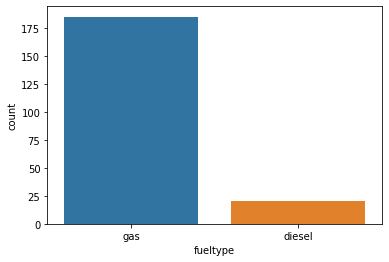

In [18]:
sns.countplot(cars_df['fueltype'])

In [19]:
# most of the cars are gas based compared to diesel

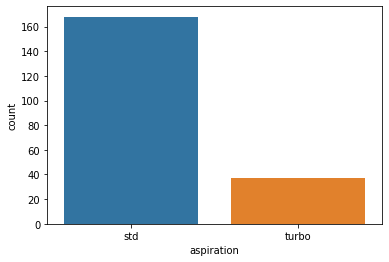

In [20]:
sns.countplot(cars_df['aspiration'])

In [21]:
#most of the cars has std as aspiration

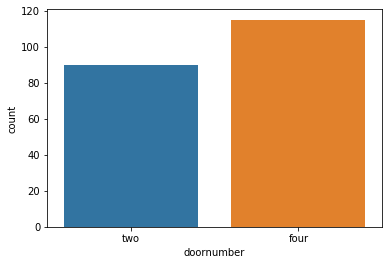

In [22]:
sns.countplot(cars_df['doornumber'])

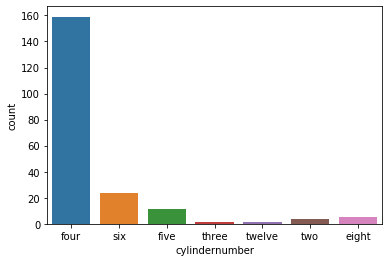

In [23]:
sns.countplot(cars_df['cylindernumber'])

In [24]:
# most number of cars has 4 doors

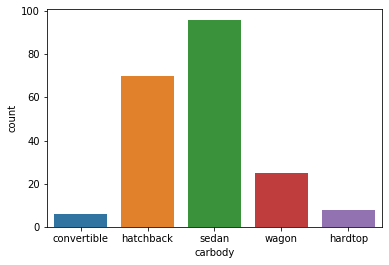

In [25]:
sns.countplot(cars_df['carbody'])

In [26]:
#most of the cars has sedan carbody and least cars have convertible carbody types

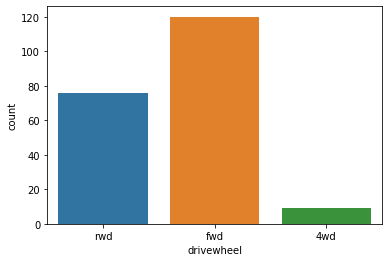

In [27]:
sns.countplot(cars_df['drivewheel'])

In [28]:
#most cars have fwd drivewheel

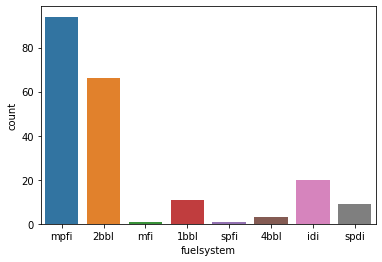

In [29]:
sns.countplot(cars_df['fuelsystem'])

In [30]:
#most cars have mpfi fuelsystem

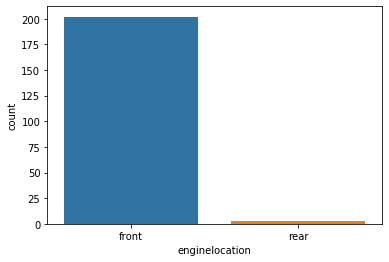

In [31]:
sns.countplot(cars_df['enginelocation'])

In [32]:
#most cars engine is located at front

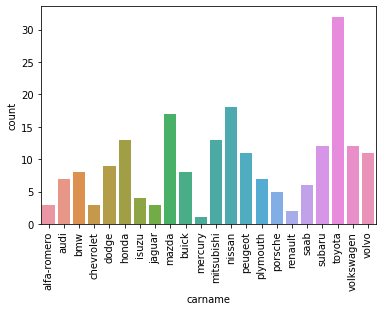

In [33]:
fig=sns.countplot(cars_df['carname'])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

In [34]:
#in given data set we have more toyato company cars

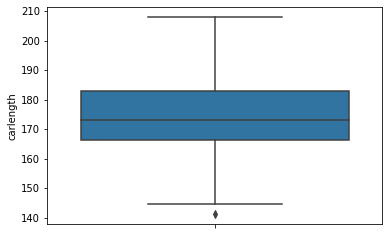

In [35]:
sns.boxplot(cars_df['carlength'],orient='v')

In [36]:
#average carlength of given cars is around 175

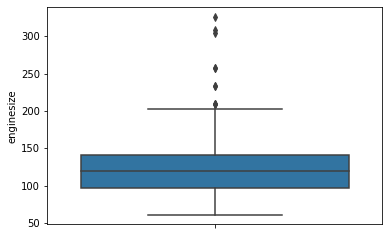

In [37]:
sns.boxplot(cars_df['enginesize'],orient='v')

In [38]:
#average enginesize of given cars is around 125

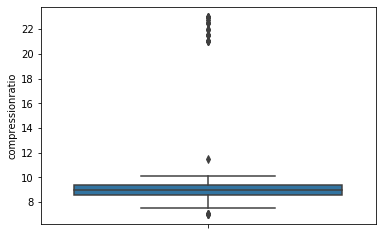

In [39]:
sns.boxplot(cars_df['compressionratio'],orient='v')

In [40]:
#average carlength of given cars is around 9 but there are cars with more than 22 compression ratio

In [41]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [42]:
cars_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carname'],
      dtype='object')

## Bivariate analysis
- to find the correlation between the target and predictor variables

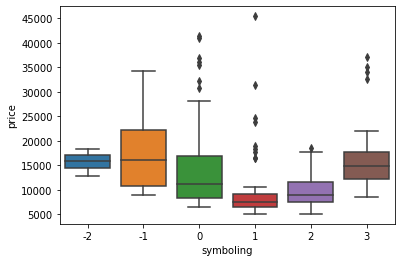

In [43]:
sns.boxplot('symboling','price',data=cars_df)

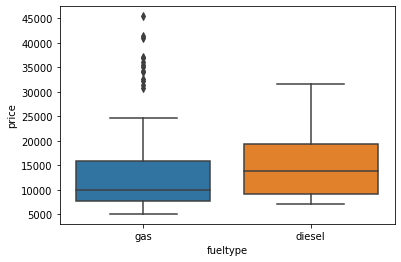

In [44]:
sns.boxplot('fueltype','price',data=cars_df)

In [45]:
#diesel fueltype is having high price than gas fueltype

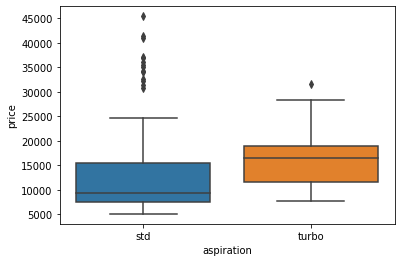

In [46]:
sns.boxplot('aspiration','price',data=cars_df)

In [47]:
#turbo aspiration has high price than std aspiration

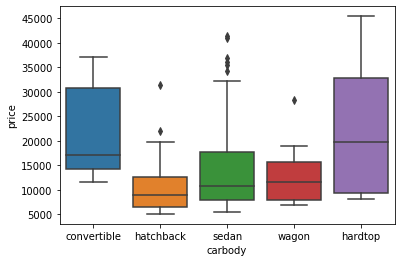

In [48]:
sns.boxplot('carbody','price',data=cars_df)

In [49]:
#convertible carbody types has high price 

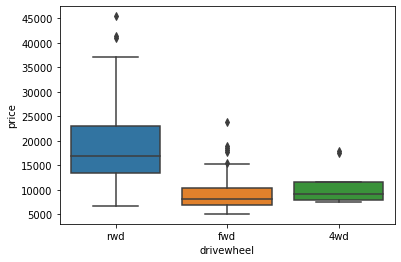

In [50]:
sns.boxplot('drivewheel','price',data=cars_df)

In [51]:
#rwd drivewheel has high price

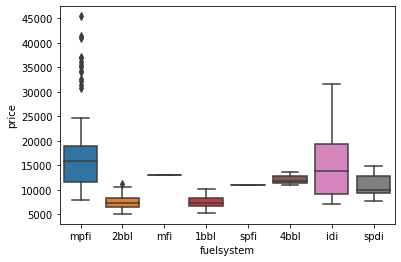

In [52]:
sns.boxplot('fuelsystem','price',data=cars_df)

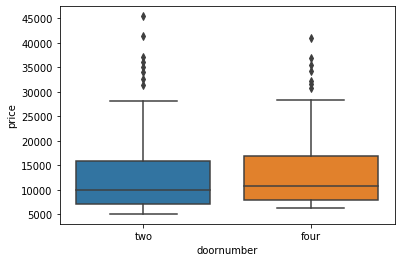

In [53]:
sns.boxplot('doornumber','price',data=cars_df)

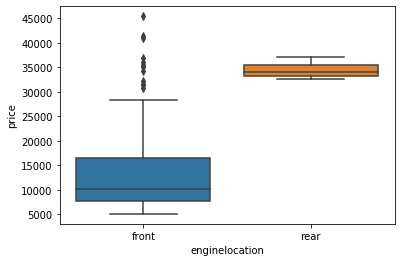

In [54]:
sns.boxplot('enginelocation','price',data=cars_df)

In [55]:
#rear located engine type car has high value

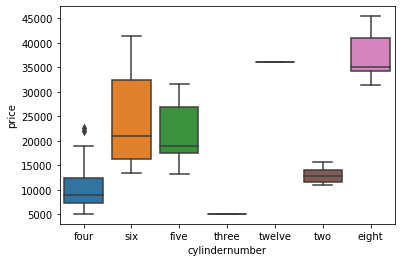

In [56]:
sns.boxplot('cylindernumber','price',data=cars_df)

In [57]:
#eight cylindered car has high price

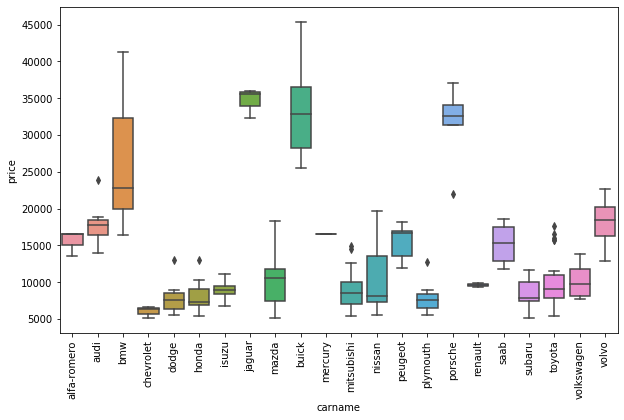

In [58]:
plt.figure(figsize=(10,6))
fig=sns.boxplot('carname','price',data=cars_df)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

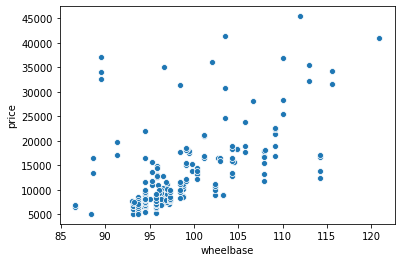

In [59]:
sns.scatterplot('wheelbase','price',data=cars_df)

In [60]:
#Wheelbase is positively correlated with price

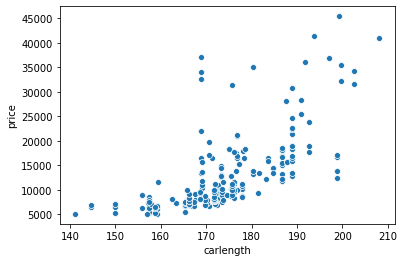

In [61]:
sns.scatterplot('carlength','price',data=cars_df)

In [62]:
#carlength is positively correlated with price

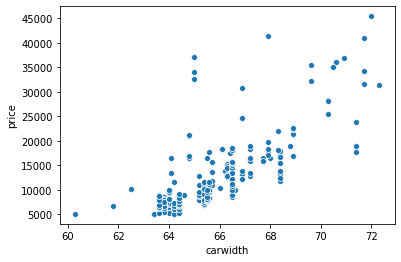

In [63]:
sns.scatterplot('carwidth','price',data=cars_df)

In [64]:
#carwidth is positively correlated with price

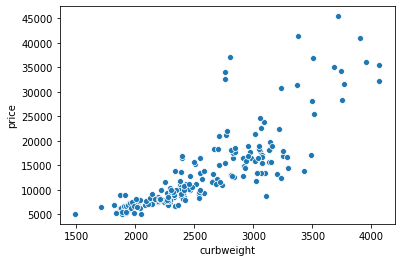

In [65]:
sns.scatterplot('curbweight','price',data=cars_df)

In [66]:
#curbweight is positively correlated with price

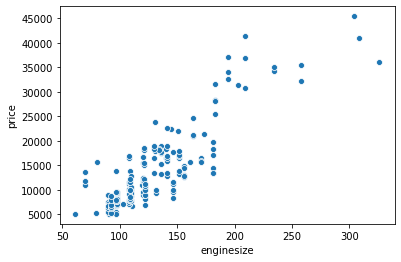

In [67]:
sns.scatterplot('enginesize','price',data=cars_df)

In [68]:
#enginesize is positively correlated with price

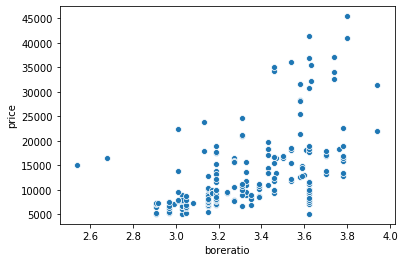

In [69]:
sns.scatterplot('boreratio','price',data=cars_df)

In [70]:
#boreratio is positively correlated with price

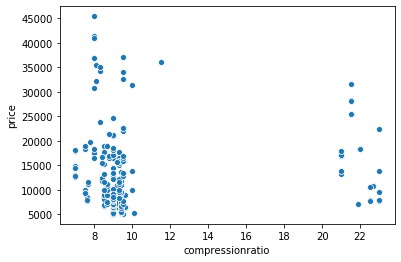

In [71]:
sns.scatterplot('compressionratio','price',data=cars_df)

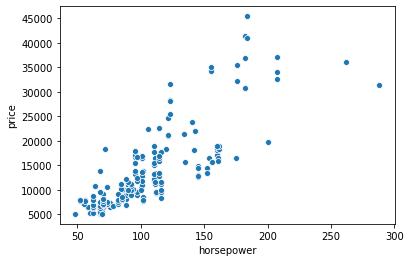

In [72]:
sns.scatterplot('horsepower','price',data=cars_df)

In [73]:
#horsepower is positively correlated with price

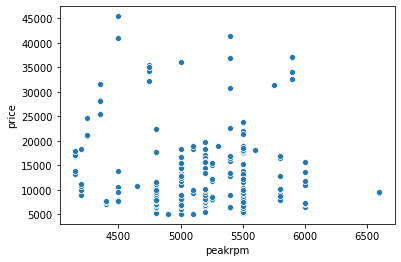

In [74]:
sns.scatterplot('peakrpm','price',data=cars_df)

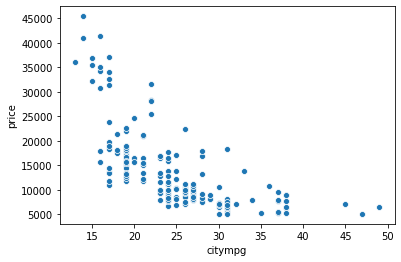

In [75]:
sns.scatterplot('citympg','price',data=cars_df)

In [76]:
#citympg is negatively correlated with price

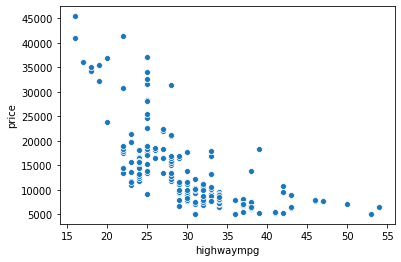

In [77]:
sns.scatterplot('highwaympg','price',data=cars_df)

In [78]:
#highwaympg is negatively correlated with price

In [79]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Encoding

- Encoding categorical variables to numerical variables

In [80]:
cars_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [81]:
#Converting fueltype using binary encoding
cars_df['fueltype']=cars_df['fueltype'].map({'gas':1,'diesel':0})

In [82]:
cars_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
label=LabelEncoder()

In [85]:
#converting string value to integer value using map so that label encoder encoding the ordinal number based on value
cars_df['doornumber']=cars_df['doornumber'].map({'four':4,'two':2})

In [86]:
#converting doornumber using label encoder as doornumber is a ordinal categorical variable
cars_df['doornumber']=label.fit_transform(cars_df['doornumber'])

In [87]:
cars_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [88]:
# using one hot encoding to transform categorical carbody variable to numerical
cars_df[['convertible','hatchback','sedan','wagon']]=pd.get_dummies(cars_df['carbody']).drop('hardtop',axis=1)

In [89]:
cars_df.drop('carbody',axis=1,inplace=True)

In [90]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,carname,convertible,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,1,std,0,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,alfa-romero,1,0,0,0
1,2,3,alfa-romero stelvio,1,std,0,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,alfa-romero,1,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,std,0,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,alfa-romero,0,1,0,0
3,4,2,audi 100 ls,1,std,1,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,5,2,audi 100ls,1,std,1,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [91]:
cars_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [92]:
#converting aspiration using binary encoding
cars_df['aspiration']=cars_df['aspiration'].map({'std':1,'turbo':0})

In [93]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,carname,convertible,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,1,1,0,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,alfa-romero,1,0,0,0
1,2,3,alfa-romero stelvio,1,1,0,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,alfa-romero,1,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,0,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,alfa-romero,0,1,0,0
3,4,2,audi 100 ls,1,1,1,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,5,2,audi 100ls,1,1,1,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [94]:
cars_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [95]:
cars_df['drivewheel'].value_counts().index

Index(['fwd', 'rwd', '4wd'], dtype='object')

In [96]:
#converting drivewheel categorical to numerical using one hot encoding
cars_df[['fwd', 'rwd']]=pd.get_dummies(cars_df['drivewheel']).drop('4wd',axis=1)

In [97]:
cars_df.drop('drivewheel',axis=1,inplace=True)

In [98]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,carname,convertible,hatchback,sedan,wagon,fwd,rwd
0,1,3,alfa-romero giulia,1,1,0,front,88.6,168.8,64.1,...,21,27,13495.0,alfa-romero,1,0,0,0,0,1
1,2,3,alfa-romero stelvio,1,1,0,front,88.6,168.8,64.1,...,21,27,16500.0,alfa-romero,1,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,1,1,0,front,94.5,171.2,65.5,...,19,26,16500.0,alfa-romero,0,1,0,0,0,1
3,4,2,audi 100 ls,1,1,1,front,99.8,176.6,66.2,...,24,30,13950.0,audi,0,0,1,0,1,0
4,5,2,audi 100ls,1,1,1,front,99.4,176.6,66.4,...,18,22,17450.0,audi,0,0,1,0,0,0


In [99]:
cars_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [100]:
#converting enginelocation categorical to numerical using binary encoding
cars_df['enginelocation']=cars_df['enginelocation'].map({'front':1,'rear':0})

In [101]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,carname,convertible,hatchback,sedan,wagon,fwd,rwd
0,1,3,alfa-romero giulia,1,1,0,1,88.6,168.8,64.1,...,21,27,13495.0,alfa-romero,1,0,0,0,0,1
1,2,3,alfa-romero stelvio,1,1,0,1,88.6,168.8,64.1,...,21,27,16500.0,alfa-romero,1,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,...,19,26,16500.0,alfa-romero,0,1,0,0,0,1
3,4,2,audi 100 ls,1,1,1,1,99.8,176.6,66.2,...,24,30,13950.0,audi,0,0,1,0,1,0
4,5,2,audi 100ls,1,1,1,1,99.4,176.6,66.4,...,18,22,17450.0,audi,0,0,1,0,0,0


In [102]:
cars_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [103]:
#converting categotical enginetype to numerical using one hot encoding
cars_df[['ohc','ohcf','ohcv','dohc','l','rotor']]=pd.get_dummies(cars_df['enginetype']).drop('dohcv',axis=1)

In [104]:
cars_df.drop('enginetype',axis=1,inplace=True)

In [105]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,sedan,wagon,fwd,rwd,ohc,ohcf,ohcv,dohc,l,rotor
0,1,3,alfa-romero giulia,1,1,0,1,88.6,168.8,64.1,...,0,0,0,1,1,0,0,0,0,0
1,2,3,alfa-romero stelvio,1,1,0,1,88.6,168.8,64.1,...,0,0,0,1,1,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,...,0,0,0,1,0,0,0,0,1,0
3,4,2,audi 100 ls,1,1,1,1,99.8,176.6,66.2,...,1,0,1,0,0,0,1,0,0,0
4,5,2,audi 100ls,1,1,1,1,99.4,176.6,66.4,...,1,0,0,0,0,0,1,0,0,0


In [106]:
cars_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [107]:
#converting cylindernumber using custom map as its value is of integer type
cars_df['cylindernumber']=cars_df['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})

In [108]:
cars_df['cylindernumber']=label.fit_transform(cars_df['cylindernumber'])

In [109]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,sedan,wagon,fwd,rwd,ohc,ohcf,ohcv,dohc,l,rotor
0,1,3,alfa-romero giulia,1,1,0,1,88.6,168.8,64.1,...,0,0,0,1,1,0,0,0,0,0
1,2,3,alfa-romero stelvio,1,1,0,1,88.6,168.8,64.1,...,0,0,0,1,1,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,...,0,0,0,1,0,0,0,0,1,0
3,4,2,audi 100 ls,1,1,1,1,99.8,176.6,66.2,...,1,0,1,0,0,0,1,0,0,0
4,5,2,audi 100ls,1,1,1,1,99.4,176.6,66.4,...,1,0,0,0,0,0,1,0,0,0


In [110]:
cars_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [111]:
#converting categotical fuelsystem to numerical using one hot encoding
cars_df[['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi']]=pd.get_dummies(cars_df['fuelsystem']).drop('spfi',axis=1)

In [112]:
cars_df.drop('fuelsystem',axis=1,inplace=True)

In [113]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,dohc,l,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,1,3,alfa-romero giulia,1,1,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,1,0
1,2,3,alfa-romero stelvio,1,1,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,1,0
2,3,1,alfa-romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,...,0,1,0,0,0,0,0,0,1,0
3,4,2,audi 100 ls,1,1,1,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,5,2,audi 100ls,1,1,1,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [114]:
cars_df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [115]:
cars_df['symboling']=label.fit_transform(cars_df['symboling'])

In [116]:
cars_df['carname'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: carname, dtype: int64

In [117]:
#coping data to a different dataframe without converting carname to numerical for farther analysis
cars_df_withoutdummies_car=cars_df.copy()

In [118]:
#removing the carname in copied dataframe
cars_df_withoutdummies_car.drop('CarName',axis=1,inplace=True)

In [119]:
cars_df['carname'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: carname, dtype: int64

In [120]:
# converting the categorical carname to numerical using one hot encoding
cars_df[['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda','isuzu', 'jaguar',
         'mazda', 'mitsubishi', 'nissan','peugeot', 'plymouth', 'porsche',
         'renault', 'saab', 'subaru', 'toyota','volkswagen', 'volvo']]=pd.get_dummies(cars_df['carname']).drop('mercury',axis=1)

In [121]:
cars_df.drop('CarName',axis=1,inplace=True)

In [122]:
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,5,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,5,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,3,1,1,0,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,4,4,1,1,1,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,4,1,1,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [123]:
#number of columns in cars dataframe 
len(cars_df.columns)

62

In [124]:
#number of columns in dataframe without carname categorical variable
len(cars_df_withoutdummies_car.columns)

41

## Data Preprocessing
- Before feeding data to the model preprocessing data by scaling to reduce the iteration to converge

In [125]:
#performing splitting before scaling 
from sklearn.model_selection import train_test_split

In [126]:
#train and test data with carname added
train_df,test_df=train_test_split(cars_df,test_size=0.3,random_state=1)

In [127]:
#train and test data without carname
train_withoutcar_df,test_withoutcar_df=train_test_split(cars_df_withoutdummies_car,test_size=0.3,random_state=1)

In [128]:
#previewing the train data
train_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
124,125,5,1,0,0,1,95.9,173.2,66.3,50.2,...,0,0,1,0,0,0,0,0,0,0
181,182,1,1,1,1,1,104.5,187.8,66.5,54.1,...,0,0,0,0,0,0,0,1,0,0
154,155,2,1,1,1,1,95.7,169.7,63.6,59.1,...,0,0,0,0,0,0,0,1,0,0
53,54,3,1,1,1,1,93.1,166.8,64.2,54.1,...,0,0,0,0,0,0,0,0,0,0
94,95,3,1,1,0,1,94.5,165.3,63.8,54.5,...,1,0,0,0,0,0,0,0,0,0


In [129]:
#previewing the train data without carname 
train_withoutcar_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,dohc,l,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
124,125,5,1,0,0,1,95.9,173.2,66.3,50.2,...,0,0,0,0,0,0,0,0,0,1
181,182,1,1,1,1,1,104.5,187.8,66.5,54.1,...,0,0,0,0,0,0,0,0,1,0
154,155,2,1,1,1,1,95.7,169.7,63.6,59.1,...,0,0,0,0,1,0,0,0,0,0
53,54,3,1,1,1,1,93.1,166.8,64.2,54.1,...,0,0,0,0,1,0,0,0,0,0
94,95,3,1,1,0,1,94.5,165.3,63.8,54.5,...,0,0,0,0,1,0,0,0,0,0


In [130]:
#importing the minmaxscaler to scale the data
#as minmax scaler removes the outlier not need to treat them separately
from sklearn.preprocessing import MinMaxScaler

In [131]:
#creating a scaler obbject to scale the data
scaler=MinMaxScaler()

In [132]:
train_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carname', 'convertible', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'alfa-romero', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [133]:
#removing car_ID,carname,price from predictor varaibles

In [139]:
numvars=['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'alfa-romero', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']

In [140]:
train_withoutcar_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carname', 'convertible', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi'],
      dtype='object')

In [141]:
#predictor variable of dataframe without carname encoded
#car_ID,carname,price are not included

In [142]:
numvar_withoutcar=[ 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi']

In [143]:
#fitting and tranforming the trained data using minmax scaler object
train_df[numvars]=scaler.fit_transform(train_df[numvars])

In [144]:
#test data should be fitted to scaler object so just transforming the test data using scaler object of trained data
test_df[numvars]=scaler.transform(test_df[numvars])

In [145]:
#same procedure is followed for train and test data without carname
scaler_withoutcar=MinMaxScaler()

In [146]:
train_withoutcar_df[numvar_withoutcar]=scaler_withoutcar.fit_transform(train_withoutcar_df[numvar_withoutcar])

In [147]:
test_withoutcar_df[numvar_withoutcar]=scaler_withoutcar.transform(test_withoutcar_df[numvar_withoutcar])

In [148]:
#previewing the training data after scaling
train_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
124,125,1.0,1.0,0.0,0.0,1.0,0.320690,0.493103,0.428571,0.200000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,182,0.2,1.0,1.0,1.0,1.0,0.617241,0.744828,0.447619,0.525000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
154,155,0.4,1.0,1.0,1.0,1.0,0.313793,0.432759,0.171429,0.941667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53,54,0.6,1.0,1.0,1.0,1.0,0.224138,0.382759,0.228571,0.525000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,95,0.6,1.0,1.0,0.0,1.0,0.272414,0.356897,0.190476,0.558333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
#preview the training data without car name after scaling
train_withoutcar_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,dohc,l,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
124,125,1.0,1.0,0.0,0.0,1.0,0.320690,0.493103,0.428571,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
181,182,0.2,1.0,1.0,1.0,1.0,0.617241,0.744828,0.447619,0.525000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
154,155,0.4,1.0,1.0,1.0,1.0,0.313793,0.432759,0.171429,0.941667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53,54,0.6,1.0,1.0,1.0,1.0,0.224138,0.382759,0.228571,0.525000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
94,95,0.6,1.0,1.0,0.0,1.0,0.272414,0.356897,0.190476,0.558333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [150]:
#segregating predictor and target variables of training data
X_train_scaled=train_df[numvars]
y_train=train_df['price']

In [151]:
#predictor variables
X_train_scaled.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'ohc',
       'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'alfa-romero', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [152]:
#segregating predictor and target variables of training data without carname
X_train_withoutcar_scaled=train_withoutcar_df[numvar_withoutcar]
y_train_withoutcar=train_withoutcar_df['price']

In [153]:
#predictor variables
X_train_withoutcar_scaled.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'ohc',
       'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi'],
      dtype='object')

In [154]:
#segregating predictor and target variables of test data
X_test_scaled=test_df[numvars]
y_test=test_df['price']

In [155]:
#segregating predictor and target variables of test data without carname
X_test_withoutcar_scaled=test_withoutcar_df[numvar_withoutcar]
y_test_withoutcar=test_withoutcar_df['price']

## Model building

In [151]:
#importing statsmodel and linearregression used for model building
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [152]:
#importing rfe for feature selection
from sklearn.feature_selection import RFE

## Feature Selection using RFE

- Since the give data has more than 60 columns so trying to use balancing technique
- First find the important features using RFE
- then perform manual approach to balance tune the variable

In [153]:
#To determine the optimum number of features from rfe created the iterative logic which return number of features at which accuarcy of model is high
score=0
list_of_features=np.arange(2,len(X_train_scaled.columns))  
num_features=0
for i in list_of_features:#loops from 2 to 62
    lr=LinearRegression().fit(X_train_scaled,y_train)
    rfe=RFE(lr,i)
    train_rfe=rfe.fit(X_train_scaled,y_train)
    features_df=pd.DataFrame(list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_)),columns=['Feature','Support','Rank'])
    features=features_df[features_df['Support']==True]['Feature'].values
    model=lr.fit(X_train_scaled[features],y_train)
    X_test=X_test_scaled[features]
    modelscore=model.score(X_test,y_test)
    if (modelscore>score):# logic to find highest model score (r2) value
        score=modelscore
        num_features=i
        model=model
        final_features=features
print("optimum features",num_features)
print("Score",score)
print("Features:",final_features)


optimum features 34
Score 0.9067319001455485
Features: ['fueltype' 'enginelocation' 'wheelbase' 'carlength' 'carwidth'
 'curbweight' 'cylindernumber' 'enginesize' 'boreratio' 'stroke'
 'compressionratio' 'peakrpm' 'citympg' 'highwaympg' 'convertible' 'ohc'
 'ohcf' 'ohcv' 'dohc' 'l' '1bbl' 'idi' 'alfa-romero' 'bmw' 'buick' 'dodge'
 'jaguar' 'maxda' 'mitsubishi' 'peugeot' 'plymouth' 'porsche' 'saab'
 'subaru']


In [154]:
# Logic to determine the optimum features from training data without carname
score=0
list_of_features=np.arange(2,len(X_train_withoutcar_scaled.columns))
num_features_withoutcar=0
for i in list_of_features:
    lr_withoutcar=LinearRegression().fit(X_train_withoutcar_scaled,y_train_withoutcar)
    rfe_withoutcar=RFE(lr_withoutcar,i)
    train_rfe_withoutcar=rfe_withoutcar.fit(X_train_withoutcar_scaled,y_train_withoutcar)
    features_withoutcar_df=pd.DataFrame(list(zip(X_train_withoutcar_scaled.columns,rfe_withoutcar.support_,rfe_withoutcar.ranking_)),columns=['Feature','Support','Rank'])
    features=features_withoutcar_df[features_withoutcar_df['Support']==True]['Feature'].values
    model=lr_withoutcar.fit(X_train_withoutcar_scaled[features],y_train_withoutcar)
    X_test_withoutcar=X_test_withoutcar_scaled[features]
    modelscore=model.score(X_test_withoutcar,y_test_withoutcar)
    if (modelscore>score):
        score=modelscore
        num_features_withoutcar=i
        model=model
        final_features_withoutcar=features
print("optimum features withoutcarname",num_features_withoutcar)
print("Score",score)
print("Features:",final_features_withoutcar)


optimum features withoutcarname 30
Score 0.8554716392124624
Features: ['symboling' 'fueltype' 'aspiration' 'enginelocation' 'wheelbase'
 'carlength' 'carwidth' 'carheight' 'curbweight' 'cylindernumber'
 'enginesize' 'boreratio' 'stroke' 'compressionratio' 'horsepower'
 'peakrpm' 'citympg' 'highwaympg' 'convertible' 'sedan' 'rwd' 'ohc' 'ohcf'
 'ohcv' 'dohc' 'l' 'rotor' '4bbl' 'idi' 'spdi']


In [155]:
##RFE model has suggested 34 features for the model with carname and 30 features for the model without carname

In [156]:
#features selected by rfe for model with carname
final_features

array(['fueltype', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', '1bbl', 'idi',
       'alfa-romero', 'bmw', 'buick', 'dodge', 'jaguar', 'maxda',
       'mitsubishi', 'peugeot', 'plymouth', 'porsche', 'saab', 'subaru'],
      dtype=object)

In [157]:
#features selected by rfe for model without carname
final_features_withoutcar

array(['symboling', 'fueltype', 'aspiration', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'convertible', 'sedan', 'rwd', 'ohc', 'ohcf', 'ohcv',
       'dohc', 'l', 'rotor', '4bbl', 'idi', 'spdi'], dtype=object)

## Model with carname feature

In [158]:
#taking all the features selected by rfe
X_train_sm=X_train_scaled[final_features]

In [159]:
# as statsmodel won't create constant on its own adding a constant explicitly
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)

In [160]:
#fitting the model using Ordinary least square estimate
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [161]:
#previewing the summary of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     93.08
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.05e-66
Time:                        21:30:19   Log-Likelihood:                -1253.1
No. Observations:                 143   AIC:                             2570.
Df Residuals:                     111   BIC:                             2665.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.514e+04   2223.326      6.808      0.000    1.07e+04    1.95e+04
fueltype          -912.9395   1826.086     -0.500      0.618   -4531.451    2705.571
enginelocation   -3393.9511   1474.980     -2.301      0.023   -6316.722    -471.180
wheelbase         7882.4028   2328.606      3.385      0.001    3268.114    1.25e+04
carlength        -8121.3395   3097.944     -2.622      0.010   -1.43e+04   -1982.558
carwidth          1.171e+04   2104.374      5.563      0.000    7536.793    1.59e+04
curbweight        7073.6977   2861.170      2.472      0.015    1404.099    1.27e+04
cylindernumber   -4696.9222   3724.008     -1.261      0.210   -1.21e+04    2682.448
enginesize        2.164e+04   4880.563      4.433      0.000     1.2e+04    3.13e+04
boreratio        -4076.8612   1982.390     -2.057      0.042   -8005.100    -148.623
stroke           -3578.1568   1633.666     -2.190      0.031   -6815.376    -340.938
compressionratio  -1.92e+04   5697.188     -3.370      0.001   -3.05e+04   -7911.306
peakrpm           4143.7588   1475.415      2.809      0.006    1220.126    7067.392
citympg           3864.0057   5076.981      0.761      0.448   -6196.371    1.39e+04
highwaympg       -3025.0785   4928.870     -0.614      0.541   -1.28e+04    6741.806
convertible       2433.3346   1121.594      2.170      0.032     210.821    4655.848
ohc              -2725.3456   1711.280     -1.593      0.114   -6116.361     665.670
ohcf             -3203.3780    874.139     -3.665      0.000   -4935.543   -1471.213
ohcv             -2888.7263   1403.962     -2.058      0.042   -5670.770    -106.683
dohc              7554.8512   1212.997      6.228      0.000    5151.216    9958.486
l                -3196.0306   1897.309     -1.685      0.095   -6955.675     563.614
1bbl             -1809.0297   1141.290     -1.585      0.116   -4070.571     452.512
idi               1.605e+04   3317.839      4.838      0.000    9475.774    2.26e+04
alfa-romero       3330.3200   1447.809      2.300      0.023     461.390    6199.250
bmw               8734.5672   1096.591      7.965      0.000    6561.599    1.09e+04
buick             6169.2433   1270.879      4.854      0.000    3650.912    8687.575
dodge            -1283.4095    902.296     -1.422      0.158   -3071.370     504.551
jaguar            5975.9552   2086.995      2.863      0.005    1840.435    1.01e+04
maxda            -2301.3623   1959.707     -1.174      0.243   -6184.652    1581.927
mitsubishi       -2487.5612    684.041     -3.637      0.000   -3843.034   -1132.089
peugeot          -3203.3780    874.139     -3.665      0.000   -4935.543   -1471.213
plymouth         -1507.6497    879.327     -1.715      0.089   -3250.095     234.796
porsche           5691.5131   1982.377      2.871      0.005    1763.300    9619.726
saab              2641.

In [162]:
#importing vif from stats model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
#created a method which return VIF of all the features in the given dataframe
def VIF(X_train):
    vif=pd.DataFrame()
    vif['Features']=X_train.columns
    vif['VIF']=[variance_inflation_factor(X_train.values,i).round(2) for i in range(X_train.shape[1])]
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [164]:
VIF(X_train_scaled_sm)

,Features,VIF
17,ohcf,inf
1,fueltype,inf
30,peugeot,inf
22,idi,inf
19,dohc,inf
34,subaru,inf
2,enginelocation,inf
11,compressionratio,87.74
13,citympg,37.69
14,highwaympg,34.72


In [165]:
#dropping fueltype as it has high P value and high VIF

In [166]:
X_train_sm.drop('fueltype',axis=1,inplace=True)

In [167]:
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     93.08
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.05e-66
Time:                        21:30:19   Log-Likelihood:                -1253.1
No. Observations:                 143   AIC:                             2570.
Df Residuals:                     111   BIC:                             2665.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.445e+04   2184.300      6.617      0.000    1.01e+04    1.88e+04
enginelocation   -3622.1860   1293.491     -2.800      0.006   -6185.326   -1059.046
wheelbase         7882.4028   2328.606      3.385      0.001    3268.114    1.25e+04
carlength        -8121.3395   3097.944     -2.622      0.010   -1.43e+04   -1982.558
carwidth          1.171e+04   2104.374      5.563      0.000    7536.793    1.59e+04
curbweight        7073.6977   2861.170      2.472      0.015    1404.099    1.27e+04
cylindernumber   -4696.9222   3724.008     -1.261      0.210   -1.21e+04    2682.448
enginesize        2.164e+04   4880.563      4.433      0.000     1.2e+04    3.13e+04
boreratio        -4076.8612   1982.390     -2.057      0.042   -8005.100    -148.623
stroke           -3578.1568   1633.666     -2.190      0.031   -6815.376    -340.938
compressionratio  -1.92e+04   5697.188     -3.370      0.001   -3.05e+04   -7911.306
peakrpm           4143.7588   1475.415      2.809      0.006    1220.126    7067.392
citympg           3864.0057   5076.981      0.761      0.448   -6196.371    1.39e+04
highwaympg       -3025.0785   4928.870     -0.614      0.541   -1.28e+04    6741.806
convertible       2433.3346   1121.594      2.170      0.032     210.821    4655.848
ohc              -2725.3456   1711.280     -1.593      0.114   -6116.361     665.670
ohcf             -3203.3780    874.139     -3.665      0.000   -4935.543   -1471.213
ohcv             -2888.7263   1403.962     -2.058      0.042   -5670.770    -106.683
dohc              7326.6163   1339.488      5.470      0.000    4672.332    9980.901
l                -3196.0306   1897.309     -1.685      0.095   -6955.675     563.614
1bbl             -1809.0297   1141.290     -1.585      0.116   -4070.571     452.512
idi               1.696e+04   4872.588      3.481      0.001    7307.875    2.66e+04
alfa-romero       3330.3200   1447.809      2.300      0.023     461.390    6199.250
bmw               8734.5672   1096.591      7.965      0.000    6561.599    1.09e+04
buick             6169.2433   1270.879      4.854      0.000    3650.912    8687.575
dodge            -1283.4095    902.296     -1.422      0.158   -3071.370     504.551
jaguar            5975.9552   2086.995      2.863      0.005    1840.435    1.01e+04
maxda            -2301.3623   1959.707     -1.174      0.243   -6184.652    1581.927
mitsubishi       -2487.5612    684.041     -3.637      0.000   -3843.034   -1132.089
peugeot          -3203.3780    874.139     -3.665      0.000   -4935.543   -1471.213
plymouth         -1507.6497    879.327     -1.715      0.089   -3250.095     234.796
porsche           5691.5131   1982.377      2.871      0.005    1763.300    9619.726
saab              2641.4954   1036.044      2.550      0.012     588.505    4694.486
subaru           -1.075

In [169]:
VIF(X_train_scaled_sm)

,Features,VIF
33,subaru,inf
29,peugeot,inf
18,dohc,inf
1,enginelocation,inf
16,ohcf,inf
21,idi,91.02
10,compressionratio,87.74
12,citympg,37.69
13,highwaympg,34.72
7,enginesize,28.53


In [170]:
#dropping highwaympg as it has high P value and high VIF

In [171]:
X_train_sm.drop('highwaympg',axis=1,inplace=True)

In [172]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [173]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     96.71
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.75e-67
Time:                        21:30:19   Log-Likelihood:                -1253.3
No. Observations:                 143   AIC:                             2569.
Df Residuals:                     112   BIC:                             2661.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.413e+04   2115.209      6.681      0.000    9941.533    1.83e+04
enginelocation   -3723.1117   1279.421     -2.910      0.004   -6258.120   -1188.103
wheelbase         8035.7733   2308.708      3.481      0.001    3461.365    1.26e+04
carlength        -8264.0034   3080.602     -2.683      0.008   -1.44e+04   -2160.185
carwidth          1.161e+04   2092.792      5.548      0.000    7464.874    1.58e+04
curbweight        7520.7662   2759.181      2.726      0.007    2053.802     1.3e+04
cylindernumber   -4937.2173   3693.050     -1.337      0.184   -1.23e+04    2380.088
enginesize        2.184e+04   4856.043      4.497      0.000    1.22e+04    3.15e+04
boreratio        -4237.4713   1959.566     -2.162      0.033   -8120.101    -354.842
stroke           -3603.7420   1628.584     -2.213      0.029   -6830.572    -376.912
compressionratio -1.907e+04   5677.525     -3.359      0.001   -3.03e+04   -7823.719
peakrpm           4331.1772   1439.445      3.009      0.003    1479.101    7183.254
citympg           1124.4863   2412.356      0.466      0.642   -3655.288    5904.261
convertible       2498.4820   1113.449      2.244      0.027     292.326    4704.637
ohc              -2542.0065   1680.310     -1.513      0.133   -5871.326     787.313
ohcf             -3137.9066    865.188     -3.627      0.000   -4852.166   -1423.648
ohcv             -2772.9260   1387.349     -1.999      0.048   -5521.780     -24.072
dohc              7384.5121   1332.439      5.542      0.000    4744.456       1e+04
l                -3047.7589   1876.622     -1.624      0.107   -6766.044     670.526
1bbl             -1755.2057   1134.745     -1.547      0.125   -4003.557     493.145
idi               1.693e+04   4858.637      3.484      0.001    7299.358    2.66e+04
alfa-romero       3194.9175   1426.914      2.239      0.027     367.669    6022.166
bmw               8688.8674   1091.011      7.964      0.000    6527.168    1.09e+04
buick             6287.3250   1252.731      5.019      0.000    3805.199    8769.451
dodge            -1334.9956    895.870     -1.490      0.139   -3110.047     440.055
jaguar            5887.7784   2076.242      2.836      0.005    1773.971       1e+04
maxda            -1855.1053   1814.756     -1.022      0.309   -5450.812    1740.602
mitsubishi       -2518.5806    680.270     -3.702      0.000   -3866.449   -1170.712
peugeot          -3137.9066    865.188     -3.627      0.000   -4852.166   -1423.648
plymouth         -1523.0493    876.520     -1.738      0.085   -3259.761     213.663
porsche           5449.4637   1937.338      2.813      0.006    1610.877    9288.051
saab              2509.9727   1010.815      2.483      0.015     507.173    4512.773
subaru           -1.047e+04   1646.031     -6.361      0.000   -1.37e+04   -7209.747
=======================

In [174]:
VIF(X_train_scaled_sm)

,Features,VIF
32,subaru,inf
28,peugeot,inf
17,dohc,inf
1,enginelocation,inf
15,ohcf,inf
20,idi,91.00
10,compressionratio,87.62
7,enginesize,28.40
16,ohcv,18.62
3,carlength,18.00


In [175]:
#dropping citympg as it has high P value

In [176]:
X_train_sm.drop('citympg',axis=1,inplace=True)

In [177]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [178]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     100.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.07e-67
Time:                        21:30:19   Log-Likelihood:                -1253.5
No. Observations:                 143   AIC:                             2567.
Df Residuals:                     113   BIC:                             2656.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.445e+04   1997.132      7.234      0.000    1.05e+04    1.84e+04
enginelocation   -3660.1901   1267.866     -2.887      0.005   -6172.062   -1148.319
wheelbase         8030.8868   2300.674      3.491      0.001    3472.836    1.26e+04
carlength        -8524.1698   3019.109     -2.823      0.006   -1.45e+04   -2542.770
carwidth          1.171e+04   2073.806      5.649      0.000    7606.193    1.58e+04
curbweight        7000.9194   2515.002      2.784      0.006    2018.246     1.2e+04
cylindernumber   -4740.5435   3656.140     -1.297      0.197    -1.2e+04    2502.930
enginesize        2.146e+04   4769.630      4.498      0.000     1.2e+04    3.09e+04
boreratio        -4158.8004   1945.512     -2.138      0.035   -8013.210    -304.391
stroke           -3633.4598   1621.689     -2.241      0.027   -6846.319    -420.601
compressionratio -1.804e+04   5213.066     -3.461      0.001   -2.84e+04   -7716.449
peakrpm           4125.2099   1365.197      3.022      0.003    1420.509    6829.911
convertible       2439.9347   1102.503      2.213      0.029     255.677    4624.193
ohc              -2315.4475   1602.901     -1.445      0.151   -5491.083     860.188
ohcf             -2998.3185    808.895     -3.707      0.000   -4600.886   -1395.751
ohcv             -2563.2957   1307.883     -1.960      0.052   -5154.448      27.857
dohc              7566.1391   1269.773      5.959      0.000    5050.489    1.01e+04
l                -2890.0197   1839.455     -1.571      0.119   -6534.312     754.273
1bbl             -1629.2907   1098.300     -1.483      0.141   -3805.222     546.641
idi               1.626e+04   4625.137      3.515      0.001    7093.010    2.54e+04
alfa-romero       3102.3776   1408.134      2.203      0.030     312.610    5892.146
bmw               8661.1141   1085.606      7.978      0.000    6510.332    1.08e+04
buick             6421.6528   1214.906      5.286      0.000    4014.705    8828.600
dodge            -1333.6660    892.757     -1.494      0.138   -3102.379     435.047
jaguar            6016.1762   2050.750      2.934      0.004    1953.271    1.01e+04
maxda            -1933.9421   1800.589     -1.074      0.285   -5501.235    1633.350
mitsubishi       -2501.8151    676.962     -3.696      0.000   -3842.999   -1160.631
peugeot          -2998.3185    808.895     -3.707      0.000   -4600.886   -1395.751
plymouth         -1458.0441    862.353     -1.691      0.094   -3166.521     250.432
porsche           5393.4456   1926.899      2.799      0.006    1575.912    9210.980
saab              2455.2132   1000.482      2.454      0.016     473.078    4437.349
subaru           -1.054e+04   1633.317     -6.454      0.000   -1.38e+04   -7306.078
==============================================================================
Omnibus:                     

In [179]:
VIF(X_train_scaled_sm)

,Features,VIF
16,dohc,inf
14,ohcf,inf
27,peugeot,inf
1,enginelocation,inf
31,subaru,inf
19,idi,83.04
10,compressionratio,74.39
7,enginesize,27.59
3,carlength,17.41
15,ohcv,16.67


In [180]:
#dropping dohc as it has high vif

In [181]:
X_train_sm.drop('dohc',axis=1,inplace=True)

In [182]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [183]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     100.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.07e-67
Time:                        21:30:19   Log-Likelihood:                -1253.5
No. Observations:                 143   AIC:                             2567.
Df Residuals:                     113   BIC:                             2656.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.201e+04   2867.891      7.676      0.000    1.63e+04    2.77e+04
enginelocation   -1.123e+04   2290.215     -4.902      0.000   -1.58e+04   -6689.000
wheelbase         8030.8868   2300.674      3.491      0.001    3472.836    1.26e+04
carlength        -8524.1698   3019.109     -2.823      0.006   -1.45e+04   -2542.770
carwidth          1.171e+04   2073.806      5.649      0.000    7606.193    1.58e+04
curbweight        7000.9194   2515.002      2.784      0.006    2018.246     1.2e+04
cylindernumber   -4740.5435   3656.140     -1.297      0.197    -1.2e+04    2502.930
enginesize        2.146e+04   4769.630      4.498      0.000     1.2e+04    3.09e+04
boreratio        -4158.8004   1945.512     -2.138      0.035   -8013.210    -304.391
stroke           -3633.4598   1621.689     -2.241      0.027   -6846.319    -420.601
compressionratio -1.804e+04   5213.066     -3.461      0.001   -2.84e+04   -7716.449
peakrpm           4125.2099   1365.197      3.022      0.003    1420.509    6829.911
convertible       2439.9347   1102.503      2.213      0.029     255.677    4624.193
ohc              -2315.4475   1602.901     -1.445      0.151   -5491.083     860.188
ohcf             -2998.3185    808.895     -3.707      0.000   -4600.886   -1395.751
ohcv             -2563.2957   1307.883     -1.960      0.052   -5154.448      27.857
l                -2890.0197   1839.455     -1.571      0.119   -6534.312     754.273
1bbl             -1629.2907   1098.300     -1.483      0.141   -3805.222     546.641
idi               1.626e+04   4625.137      3.515      0.001    7093.010    2.54e+04
alfa-romero       3102.3776   1408.134      2.203      0.030     312.610    5892.146
bmw               8661.1141   1085.606      7.978      0.000    6510.332    1.08e+04
buick             6421.6528   1214.906      5.286      0.000    4014.705    8828.600
dodge            -1333.6660    892.757     -1.494      0.138   -3102.379     435.047
jaguar            6016.1762   2050.750      2.934      0.004    1953.271    1.01e+04
maxda            -1933.9421   1800.589     -1.074      0.285   -5501.235    1633.350
mitsubishi       -2501.8151    676.962     -3.696      0.000   -3842.999   -1160.631
peugeot          -2998.3185    808.895     -3.707      0.000   -4600.886   -1395.751
plymouth         -1458.0441    862.353     -1.691      0.094   -3166.521     250.432
porsche           5393.4456   1926.899      2.799      0.006    1575.912    9210.980
saab              2455.2132   1000.482      2.454      0.016     473.078    4437.349
subaru           -2975.8345   1689.818     -1.761      0.081   -6323.669     372.000
==============================================================================
Omnibus:                       10.153   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.0

In [184]:
VIF(X_train_scaled_sm)

,Features,VIF
26,peugeot,inf
14,ohcf,inf
0,const,386.32
18,idi,83.04
10,compressionratio,74.39
7,enginesize,27.59
3,carlength,17.41
15,ohcv,16.67
6,cylindernumber,14.69
5,curbweight,13.80


In [185]:
#dropping peugeot as it has high VIF

In [186]:
X_train_sm.drop('peugeot',axis=1,inplace=True)

In [187]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [188]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     100.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.07e-67
Time:                        21:30:19   Log-Likelihood:                -1253.5
No. Observations:                 143   AIC:                             2567.
Df Residuals:                     113   BIC:                             2656.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.201e+04   2867.891      7.676      0.000    1.63e+04    2.77e+04
enginelocation   -1.123e+04   2290.215     -4.902      0.000   -1.58e+04   -6689.000
wheelbase         8030.8868   2300.674      3.491      0.001    3472.836    1.26e+04
carlength        -8524.1698   3019.109     -2.823      0.006   -1.45e+04   -2542.770
carwidth          1.171e+04   2073.806      5.649      0.000    7606.193    1.58e+04
curbweight        7000.9194   2515.002      2.784      0.006    2018.246     1.2e+04
cylindernumber   -4740.5435   3656.140     -1.297      0.197    -1.2e+04    2502.930
enginesize        2.146e+04   4769.630      4.498      0.000     1.2e+04    3.09e+04
boreratio        -4158.8004   1945.512     -2.138      0.035   -8013.210    -304.391
stroke           -3633.4598   1621.689     -2.241      0.027   -6846.319    -420.601
compressionratio -1.804e+04   5213.066     -3.461      0.001   -2.84e+04   -7716.449
peakrpm           4125.2099   1365.197      3.022      0.003    1420.509    6829.911
convertible       2439.9347   1102.503      2.213      0.029     255.677    4624.193
ohc              -2315.4475   1602.901     -1.445      0.151   -5491.083     860.188
ohcf             -5996.6369   1617.790     -3.707      0.000   -9201.771   -2791.502
ohcv             -2563.2957   1307.883     -1.960      0.052   -5154.448      27.857
l                -2890.0197   1839.455     -1.571      0.119   -6534.312     754.273
1bbl             -1629.2907   1098.300     -1.483      0.141   -3805.222     546.641
idi               1.626e+04   4625.137      3.515      0.001    7093.010    2.54e+04
alfa-romero       3102.3776   1408.134      2.203      0.030     312.610    5892.146
bmw               8661.1141   1085.606      7.978      0.000    6510.332    1.08e+04
buick             6421.6528   1214.906      5.286      0.000    4014.705    8828.600
dodge            -1333.6660    892.757     -1.494      0.138   -3102.379     435.047
jaguar            6016.1762   2050.750      2.934      0.004    1953.271    1.01e+04
maxda            -1933.9421   1800.589     -1.074      0.285   -5501.235    1633.350
mitsubishi       -2501.8151    676.962     -3.696      0.000   -3842.999   -1160.631
plymouth         -1458.0441    862.353     -1.691      0.094   -3166.521     250.432
porsche           5393.4456   1926.899      2.799      0.006    1575.912    9210.980
saab              2455.2132   1000.482      2.454      0.016     473.078    4437.349
subaru           -2975.8345   1689.818     -1.761      0.081   -6323.669     372.000
==============================================================================
Omnibus:                       10.153   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.536
Skew:                           0.554   P

In [189]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,386.32
18,idi,83.04
10,compressionratio,74.39
7,enginesize,27.59
3,carlength,17.41
15,ohcv,16.67
6,cylindernumber,14.69
5,curbweight,13.80
2,wheelbase,10.42
16,l,10.34


In [190]:
#dropping maxda as it has high P value

In [191]:
X_train_sm.drop('maxda',axis=True,inplace=True)

In [192]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [193]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.83e-68
Time:                        21:30:20   Log-Likelihood:                -1254.2
No. Observations:                 143   AIC:                             2566.
Df Residuals:                     114   BIC:                             2652.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.172e+04   2856.640      7.603      0.000    1.61e+04    2.74e+04
enginelocation   -1.114e+04   2290.370     -4.864      0.000   -1.57e+04   -6603.538
wheelbase         7980.1776   2301.739      3.467      0.001    3420.451    1.25e+04
carlength        -8230.0052   3008.686     -2.735      0.007   -1.42e+04   -2269.822
carwidth          1.153e+04   2067.682      5.574      0.000    7429.257    1.56e+04
curbweight        7155.2400   2512.586      2.848      0.005    2177.827    1.21e+04
cylindernumber   -4807.1364   3658.076     -1.314      0.191   -1.21e+04    2439.485
enginesize         2.15e+04   4772.677      4.504      0.000     1.2e+04     3.1e+04
boreratio        -4153.2285   1946.815     -2.133      0.035   -8009.854    -296.603
stroke           -3575.8528   1621.894     -2.205      0.029   -6788.812    -362.894
compressionratio -1.769e+04   5206.281     -3.398      0.001    -2.8e+04   -7379.248
peakrpm           4176.8224   1365.270      3.059      0.003    1472.234    6881.411
convertible       2490.5935   1102.236      2.260      0.026     307.073    4674.114
ohc              -2349.3334   1603.670     -1.465      0.146   -5526.191     827.524
ohcf             -6030.7361   1618.568     -3.726      0.000   -9237.107   -2824.365
ohcv             -2577.0895   1308.701     -1.969      0.051   -5169.616      15.437
l                -2887.5688   1840.693     -1.569      0.119   -6533.967     758.829
1bbl             -1520.0054   1094.314     -1.389      0.168   -3687.832     647.821
idi               1.599e+04   4621.624      3.460      0.001    6835.089    2.51e+04
alfa-romero       3098.8852   1409.079      2.199      0.030     307.511    5890.260
bmw               8658.0100   1086.333      7.970      0.000    6505.992    1.08e+04
buick             6382.8894   1215.188      5.253      0.000    3975.612    8790.167
dodge            -1233.6653    888.487     -1.389      0.168   -2993.751     526.420
jaguar            5917.3449   2050.064      2.886      0.005    1856.184    9978.506
mitsubishi       -2439.2197    674.903     -3.614      0.000   -3776.197   -1102.242
plymouth         -1412.8100    861.904     -1.639      0.104   -3120.235     294.615
porsche           5446.0364   1927.574      2.825      0.006    1627.527    9264.545
saab              2424.1612   1000.738      2.422      0.017     441.707    4406.615
subaru           -2913.5895   1689.962     -1.724      0.087   -6261.391     434.211
==============================================================================
Omnibus:                        9.795   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.010
Skew:                           0.550   Prob(JB):                      0.00670
Kurtosis:                       3.685   Cond. N

In [194]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,382.78
18,idi,82.80
10,compressionratio,74.09
7,enginesize,27.59
3,carlength,17.26
15,ohcv,16.67
6,cylindernumber,14.69
5,curbweight,13.76
2,wheelbase,10.41
16,l,10.34


In [195]:
#dropping cylindernumber as it has high p value and VIF

In [196]:
X_train_sm.drop('cylindernumber',axis=1,inplace=True)

In [197]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [198]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     107.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.08e-69
Time:                        21:30:22   Log-Likelihood:                -1255.3
No. Observations:                 143   AIC:                             2567.
Df Residuals:                     115   BIC:                             2650.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.998e+04   2538.853      7.869      0.000    1.49e+04     2.5e+04
enginelocation    -1.07e+04   2272.403     -4.707      0.000   -1.52e+04   -6195.047
wheelbase         7495.8201   2279.206      3.289      0.001    2981.152     1.2e+04
carlength        -7648.9142   2985.404     -2.562      0.012   -1.36e+04   -1735.403
carwidth          1.111e+04   2049.644      5.420      0.000    7048.454    1.52e+04
curbweight        6671.7029   2493.340      2.676      0.009    1732.876    1.16e+04
enginesize        1.741e+04   3633.803      4.792      0.000    1.02e+04    2.46e+04
boreratio        -2265.6605   1318.264     -1.719      0.088   -4876.888     345.568
stroke           -3530.6953   1626.646     -2.171      0.032   -6752.769    -308.622
compressionratio -1.899e+04   5127.551     -3.704      0.000   -2.91e+04   -8836.215
peakrpm           4395.9027   1359.329      3.234      0.002    1703.334    7088.471
convertible       2407.0379   1103.873      2.181      0.031     220.479    4593.597
ohc              -3189.4143   1475.384     -2.162      0.033   -6111.865    -266.963
ohcf             -6233.4639   1616.284     -3.857      0.000   -9435.011   -3031.917
ohcv             -3012.7415   1270.010     -2.372      0.019   -5528.387    -497.096
l                -3855.3590   1692.267     -2.278      0.025   -7207.414    -503.304
1bbl             -1395.6588   1093.655     -1.276      0.204   -3561.979     770.661
idi               1.721e+04   4541.896      3.789      0.000    8212.645    2.62e+04
alfa-romero       3556.2101   1369.736      2.596      0.011     843.026    6269.394
bmw               8207.9005   1034.176      7.937      0.000    6159.398    1.03e+04
buick             6856.4518   1164.187      5.889      0.000    4550.422    9162.481
dodge            -1208.6050    891.085     -1.356      0.178   -2973.673     556.463
jaguar            7015.6298   1877.876      3.736      0.000    3295.919    1.07e+04
mitsubishi       -2374.2811    675.215     -3.516      0.001   -3711.753   -1036.810
plymouth         -1316.9851    861.524     -1.529      0.129   -3023.498     389.528
porsche           4548.3796   1808.167      2.515      0.013     966.749    8130.010
saab              2616.0428    993.152      2.634      0.010     648.800    4583.286
subaru           -3813.3681   1549.917     -2.460      0.015   -6883.455    -743.282
==============================================================================
Omnibus:                       15.533   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.558
Skew:                           0.691   Prob(JB):                     9.34e-05
Kurtosis:                       4.098   Cond. No.                         99.9
=====================================================

In [199]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,300.45
17,idi,79.47
9,compressionratio,71.42
3,carlength,16.89
6,enginesize,15.89
14,ohcv,15.60
5,curbweight,13.46
2,wheelbase,10.14
15,l,8.68
4,carwidth,8.24


In [200]:
#dropping 1bbl as it has high p value

In [201]:
X_train_sm.drop('1bbl',axis=1,inplace=True)

In [202]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [203]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     110.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.54e-70
Time:                        21:30:23   Log-Likelihood:                -1256.3
No. Observations:                 143   AIC:                             2567.
Df Residuals:                     116   BIC:                             2647.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.985e+04   2543.850      7.805      0.000    1.48e+04    2.49e+04
enginelocation   -1.034e+04   2260.864     -4.572      0.000   -1.48e+04   -5857.687
wheelbase         6883.8053   2234.207      3.081      0.003    2458.677    1.13e+04
carlength        -5946.2858   2677.909     -2.220      0.028   -1.13e+04    -642.350
carwidth          1.081e+04   2041.546      5.294      0.000    6763.973    1.49e+04
curbweight        6264.9018   2479.569      2.527      0.013    1353.803    1.12e+04
enginesize        1.707e+04   3633.305      4.697      0.000    9868.951    2.43e+04
boreratio        -2141.9983   1318.255     -1.625      0.107   -4752.968     468.972
stroke           -3873.7527   1608.620     -2.408      0.018   -7059.827    -687.678
compressionratio -1.978e+04   5104.363     -3.875      0.000   -2.99e+04   -9667.322
peakrpm           3998.9244   1326.836      3.014      0.003    1370.959    6626.890
convertible       2502.7500   1104.301      2.266      0.025     315.542    4689.958
ohc              -3315.1949   1476.070     -2.246      0.027   -6238.738    -391.651
ohcf             -6641.3935   1588.645     -4.181      0.000   -9787.905   -3494.882
ohcv             -3246.1823   1260.167     -2.576      0.011   -5742.102    -750.262
l                -3904.4409   1696.407     -2.302      0.023   -7264.389    -544.493
idi               1.793e+04   4519.111      3.967      0.000    8976.560    2.69e+04
alfa-romero       3356.8540   1364.480      2.460      0.015     654.329    6059.380
bmw               8222.0444   1036.914      7.929      0.000    6168.306    1.03e+04
buick             6783.8610   1165.942      5.818      0.000    4474.566    9093.156
dodge             -826.8175    841.633     -0.982      0.328   -2493.777     840.142
jaguar            7136.6407   1880.555      3.795      0.000    3411.965    1.09e+04
mitsubishi       -2215.6039    665.463     -3.329      0.001   -3533.638    -897.570
plymouth         -1139.7062    852.550     -1.337      0.184   -2828.290     548.877
porsche           4867.8277   1795.601      2.711      0.008    1311.414    8424.241
saab              2359.2211    975.179      2.419      0.017     427.755    4290.687
subaru           -4142.5694   1532.433     -2.703      0.008   -7177.746   -1107.393
==============================================================================
Omnibus:                       14.444   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.905
Skew:                           0.660   Prob(JB):                     0.000213
Kurtosis:                       4.047   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

In [204]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,300.01
16,idi,78.25
9,compressionratio,70.39
6,enginesize,15.80
14,ohcv,15.27
3,carlength,13.52
5,curbweight,13.24
2,wheelbase,9.69
15,l,8.68
4,carwidth,8.13


In [205]:
#dropping dodge as it has high P value

In [206]:
X_train_sm.drop('dodge',axis=1,inplace=True)

In [207]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [208]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.27e-70
Time:                        21:30:24   Log-Likelihood:                -1256.9
No. Observations:                 143   AIC:                             2566.
Df Residuals:                     117   BIC:                             2643.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.975e+04   2541.248      7.772      0.000    1.47e+04    2.48e+04
enginelocation   -1.035e+04   2260.444     -4.581      0.000   -1.48e+04   -5877.842
wheelbase         6547.4950   2207.495      2.966      0.004    2175.667    1.09e+04
carlength        -5251.3867   2582.414     -2.034      0.044   -1.04e+04    -137.051
carwidth          1.089e+04   2039.444      5.341      0.000    6852.664    1.49e+04
curbweight        6198.1409   2478.268      2.501      0.014    1290.062    1.11e+04
enginesize        1.668e+04   3611.478      4.618      0.000    9527.001    2.38e+04
boreratio        -2005.1413   1310.678     -1.530      0.129   -4600.870     590.588
stroke           -3890.3954   1608.291     -2.419      0.017   -7075.531    -705.260
compressionratio -1.937e+04   5086.932     -3.808      0.000   -2.94e+04   -9297.784
peakrpm           3710.8612   1293.837      2.868      0.005    1148.486    6273.237
convertible       2557.9269   1102.708      2.320      0.022     374.072    4741.782
ohc              -3311.1514   1475.845     -2.244      0.027   -6233.984    -388.319
ohcf             -6776.0121   1582.488     -4.282      0.000   -9910.046   -3641.978
ohcv             -3324.0334   1257.486     -2.643      0.009   -5814.418    -833.649
l                -3877.0745   1695.926     -2.286      0.024   -7235.766    -518.383
idi               1.757e+04   4504.019      3.902      0.000    8652.875    2.65e+04
alfa-romero       3274.7568   1361.716      2.405      0.018     577.950    5971.564
bmw               8284.4859   1034.810      8.006      0.000    6235.099    1.03e+04
buick             6727.2526   1164.344      5.778      0.000    4421.331    9033.174
jaguar            7131.4885   1880.267      3.793      0.000    3407.719    1.09e+04
mitsubishi       -2088.2091    652.609     -3.200      0.002   -3380.667    -795.752
plymouth         -1011.1293    842.319     -1.200      0.232   -2679.297     657.039
porsche           4919.3684   1794.566      2.741      0.007    1365.324    8473.413
saab              2260.5491    969.849      2.331      0.021     339.815    4181.283
subaru           -4238.1245   1529.115     -2.772      0.006   -7266.456   -1209.793
==============================================================================
Omnibus:                       14.968   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.500
Skew:                           0.682   Prob(JB):                     0.000158
Kurtosis:                       4.037   Cond. No.                         98.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,299.49
16,idi,77.75
9,compressionratio,69.93
6,enginesize,15.62
14,ohcv,15.21
5,curbweight,13.23
3,carlength,12.57
2,wheelbase,9.47
15,l,8.68
4,carwidth,8.11


In [210]:
#dropping plymouth as it has high p value

In [211]:
X_train_sm.drop('plymouth',axis=1,inplace=True)

In [212]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [213]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     119.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.33e-71
Time:                        21:30:25   Log-Likelihood:                -1257.8
No. Observations:                 143   AIC:                             2566.
Df Residuals:                     118   BIC:                             2640.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.997e+04   2539.155      7.866      0.000    1.49e+04     2.5e+04
enginelocation   -1.064e+04   2251.932     -4.726      0.000   -1.51e+04   -6182.417
wheelbase         6537.8412   2211.601      2.956      0.004    2158.269    1.09e+04
carlength        -5348.7055   2585.960     -2.068      0.041   -1.05e+04    -227.801
carwidth          1.133e+04   2010.545      5.634      0.000    7346.528    1.53e+04
curbweight        6188.7849   2482.882      2.493      0.014    1272.002    1.11e+04
enginesize        1.612e+04   3588.307      4.493      0.000    9017.215    2.32e+04
boreratio        -1846.2111   1306.408     -1.413      0.160   -4433.255     740.833
stroke           -4021.1610   1607.593     -2.501      0.014   -7204.632    -837.690
compressionratio -1.886e+04   5078.447     -3.714      0.000   -2.89e+04   -8802.973
peakrpm           3510.1744   1285.385      2.731      0.007     964.762    6055.587
convertible       2568.0322   1104.734      2.325      0.022     380.358    4755.707
ohc              -3174.0289   1474.164     -2.153      0.033   -6093.275    -254.782
ohcf             -6808.0879   1585.216     -4.295      0.000   -9947.247   -3668.929
ohcv             -3318.8600   1259.826     -2.634      0.010   -5813.658    -824.062
l                -3734.1161   1694.897     -2.203      0.030   -7090.474    -377.758
idi               1.715e+04   4498.829      3.813      0.000    8244.515    2.61e+04
alfa-romero       3255.4390   1364.163      2.386      0.019     554.025    5956.853
bmw               8430.1332   1029.591      8.188      0.000    6391.263    1.05e+04
buick             6706.0684   1166.383      5.749      0.000    4396.312    9015.825
jaguar            7232.5799   1881.887      3.843      0.000    3505.932     1.1e+04
mitsubishi       -1957.0528    644.599     -3.036      0.003   -3233.534    -680.572
porsche           4853.7531   1797.082      2.701      0.008    1295.041    8412.466
saab              2268.5045    971.636      2.335      0.021     344.400    4192.609
subaru           -4280.4643   1531.562     -2.795      0.006   -7313.374   -1247.555
==============================================================================
Omnibus:                       15.000   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.643
Skew:                           0.679   Prob(JB):                     0.000148
Kurtosis:                       4.056   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,297.88
16,idi,77.28
9,compressionratio,69.44
6,enginesize,15.36
14,ohcv,15.21
5,curbweight,13.23
3,carlength,12.56
2,wheelbase,9.47
15,l,8.63
4,carwidth,7.86


In [215]:
#dropping boreratio as it has high P value 

In [216]:
X_train_sm.drop('boreratio',axis=1,inplace=True)

In [217]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     123.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.52e-72
Time:                        21:30:26   Log-Likelihood:                -1259.0
No. Observations:                 143   AIC:                             2566.
Df Residuals:                     119   BIC:                             2637.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.999e+04   2549.746      7.840      0.000    1.49e+04     2.5e+04
enginelocation   -1.152e+04   2173.367     -5.301      0.000   -1.58e+04   -7217.426
wheelbase         6446.5599   2219.900      2.904      0.004    2050.936    1.08e+04
carlength        -6103.9829   2540.707     -2.402      0.018   -1.11e+04   -1073.128
carwidth          1.195e+04   1969.406      6.070      0.000    8053.918    1.59e+04
curbweight        6089.0457   2492.255      2.443      0.016    1154.132     1.1e+04
enginesize         1.44e+04   3387.789      4.249      0.000    7687.422    2.11e+04
stroke           -4074.7632   1613.865     -2.525      0.013   -7270.376    -879.150
compressionratio  -1.81e+04   5071.268     -3.570      0.001   -2.81e+04   -8061.549
peakrpm           3534.8954   1290.640      2.739      0.007     979.300    6090.491
convertible       2305.3978   1093.543      2.108      0.037     140.073    4470.722
ohc              -2689.8658   1439.795     -1.868      0.064   -5540.804     161.072
ohcf             -6546.7441   1580.974     -4.141      0.000   -9677.231   -3416.257
ohcv             -2973.8243   1241.108     -2.396      0.018   -5431.343    -516.306
l                -3056.9634   1632.552     -1.873      0.064   -6289.579     175.652
idi               1.656e+04   4497.706      3.681      0.000    7650.952    2.55e+04
alfa-romero       3452.1238   1362.718      2.533      0.013     753.806    6150.442
bmw               8676.9752   1018.908      8.516      0.000    6659.435    1.07e+04
buick             6988.8509   1153.895      6.057      0.000    4704.024    9273.678
jaguar            7864.3690   1835.656      4.284      0.000    4229.588    1.15e+04
mitsubishi       -1911.8233    646.495     -2.957      0.004   -3191.949    -631.698
porsche           4244.8272   1751.955      2.423      0.017     775.781    7713.874
saab              2300.3485    975.436      2.358      0.020     368.887    4231.810
subaru           -4480.3239   1531.394     -2.926      0.004   -7512.638   -1448.010
==============================================================================
Omnibus:                       14.602   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.862
Skew:                           0.639   Prob(JB):                     0.000132
Kurtosis:                       4.169   Cond. No.                         93.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,297.87
15,idi,76.60
8,compressionratio,68.67
13,ohcv,14.64
6,enginesize,13.58
5,curbweight,13.22
3,carlength,12.02
2,wheelbase,9.46
14,l,7.94
4,carwidth,7.48


In [219]:
#dropping idi as it has high vif value 

In [220]:
X_train_sm.drop('idi',axis=1,inplace=True)

In [221]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     116.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.94e-70
Time:                        21:30:27   Log-Likelihood:                -1266.7
No. Observations:                 143   AIC:                             2579.
Df Residuals:                     120   BIC:                             2647.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.747e+04   2581.124      6.767      0.000    1.24e+04    2.26e+04
enginelocation   -1.312e+04   2238.365     -5.859      0.000   -1.75e+04   -8683.801
wheelbase         6347.4782   2332.934      2.721      0.007    1728.430     1.1e+04
carlength        -7389.0163   2644.949     -2.794      0.006   -1.26e+04   -2152.202
carwidth          1.227e+04   2067.893      5.932      0.000    8173.465    1.64e+04
curbweight        9927.5309   2379.071      4.173      0.000    5217.135    1.46e+04
enginesize        1.234e+04   3511.908      3.514      0.001    5387.847    1.93e+04
stroke           -1777.4262   1564.215     -1.136      0.258   -4874.463    1319.611
compressionratio   334.5067    835.099      0.401      0.689   -1318.931    1987.945
peakrpm           2678.6111   1334.244      2.008      0.047      36.900    5320.322
convertible       2521.4449   1147.653      2.197      0.030     249.172    4793.718
ohc              -2224.7978   1507.382     -1.476      0.143   -5209.309     759.714
ohcf             -5094.3906   1609.027     -3.166      0.002   -8280.152   -1908.629
ohcv             -2243.3114   1287.618     -1.742      0.084   -4792.705     306.082
l                -2734.8560   1713.339     -1.596      0.113   -6127.148     657.436
alfa-romero       3558.9155   1431.886      2.485      0.014     723.880    6393.951
bmw               8957.2653   1067.874      8.388      0.000    6842.949    1.11e+04
buick             7293.7812   1209.610      6.030      0.000    4898.838    9688.724
jaguar            6081.2057   1860.882      3.268      0.001    2396.788    9765.623
mitsubishi       -1103.1892    639.039     -1.726      0.087   -2368.442     162.063
porsche           3241.0606   1818.859      1.782      0.077    -360.154    6842.276
saab              2261.9852   1025.121      2.207      0.029     232.317    4291.653
subaru           -3162.0904   1564.866     -2.021      0.046   -6260.417     -63.764
==============================================================================
Omnibus:                       14.734   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.156
Skew:                           0.640   Prob(JB):                     0.000114
Kurtosis:                       4.188   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,276.35
13,ohcv,14.27
6,enginesize,13.21
3,carlength,11.80
5,curbweight,10.91
2,wheelbase,9.46
14,l,7.92
4,carwidth,7.46
11,ohc,6.13
22,subaru,5.99


In [223]:
#dropping compressionratio as it has high P value 

In [224]:
X_train_sm.drop('compressionratio',axis=1,inplace=True)

In [225]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     122.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.83e-71
Time:                        21:30:28   Log-Likelihood:                -1266.8
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     121   BIC:                             2643.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.774e+04   2478.441      7.159      0.000    1.28e+04    2.26e+04
enginelocation -1.326e+04   2203.015     -6.017      0.000   -1.76e+04   -8894.691
wheelbase       6453.0394   2309.946      2.794      0.006    1879.892     1.1e+04
carlength      -7500.8252   2621.038     -2.862      0.005   -1.27e+04   -2311.789
carwidth        1.239e+04   2039.454      6.073      0.000    8348.765    1.64e+04
curbweight      9992.8201   2365.233      4.225      0.000    5310.218    1.47e+04
enginesize      1.197e+04   3373.694      3.547      0.001    5287.982    1.86e+04
stroke         -1653.1056   1527.787     -1.082      0.281   -4677.762    1371.551
peakrpm         2419.4897   1162.876      2.081      0.040     117.269    4721.710
convertible     2514.3840   1143.529      2.199      0.030     250.466    4778.302
ohc            -2199.3315   1500.807     -1.465      0.145   -5170.575     771.912
ohcf           -5114.2705   1602.672     -3.191      0.002   -8287.183   -1941.358
ohcv           -2263.2094   1282.188     -1.765      0.080   -4801.638     275.219
l              -2714.7288   1706.650     -1.591      0.114   -6093.493     664.035
alfa-romero     3559.1150   1426.910      2.494      0.014     734.170    6384.060
bmw             8974.0500   1063.344      8.439      0.000    6868.881    1.11e+04
buick           7335.8656   1200.851      6.109      0.000    4958.465    9713.266
jaguar          6164.3008   1842.857      3.345      0.001    2515.880    9812.721
mitsubishi     -1136.6072    631.368     -1.800      0.074   -2386.566     113.352
porsche         3307.0717   1805.083      1.832      0.069    -266.567    6880.710
saab            2286.5247   1019.733      2.242      0.027     267.695    4305.354
subaru         -3217.7158   1553.275     -2.072      0.040   -6292.834    -142.597
==============================================================================
Omnibus:                       14.808   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.144
Skew:                           0.646   Prob(JB):                     0.000115
Kurtosis:                       4.173   Cond. No.                         54.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,256.58
12,ohcv,14.25
6,enginesize,12.27
3,carlength,11.67
5,curbweight,10.86
2,wheelbase,9.34
13,l,7.91
4,carwidth,7.31
10,ohc,6.12
21,subaru,5.94


In [227]:
#dropping stroke as it has high P value 

In [228]:
X_train_sm.drop(['stroke'],axis=1,inplace=True)

In [229]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.39e-72
Time:                        21:30:29   Log-Likelihood:                -1267.5
No. Observations:                 143   AIC:                             2577.
Df Residuals:                     122   BIC:                             2639.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.684e+04   2335.710      7.210      0.000    1.22e+04    2.15e+04
enginelocation -1.336e+04   2202.290     -6.068      0.000   -1.77e+04   -9004.558
wheelbase       6653.7438   2304.098      2.888      0.005    2092.552    1.12e+04
carlength      -7290.7660   2615.667     -2.787      0.006   -1.25e+04   -2112.791
carwidth        1.222e+04   2035.103      6.005      0.000    8191.774    1.62e+04
curbweight      9839.0515   2362.611      4.164      0.000    5162.026    1.45e+04
enginesize      1.112e+04   3284.343      3.386      0.001    4620.338    1.76e+04
peakrpm         2548.3754   1157.569      2.201      0.030     256.852    4839.899
convertible     2749.4372   1123.492      2.447      0.016     525.373    4973.501
ohc            -2094.4233   1498.720     -1.397      0.165   -5061.289     872.442
ohcf           -4821.7842   1580.817     -3.050      0.003   -7951.169   -1692.399
ohcv           -2218.2157   1282.410     -1.730      0.086   -4756.874     320.443
l              -2256.7396   1654.486     -1.364      0.175   -5531.960    1018.481
alfa-romero     3666.1324   1424.474      2.574      0.011     846.243    6486.022
bmw             9238.5429   1035.590      8.921      0.000    7188.489    1.13e+04
buick           7422.0446   1199.045      6.190      0.000    5048.416    9795.673
jaguar          6440.9929   1826.306      3.527      0.001    2825.639    1.01e+04
mitsubishi     -1239.1098    624.657     -1.984      0.050   -2475.681      -2.539
porsche         3806.1259   1746.386      2.179      0.031     348.981    7263.271
saab            2619.9238    972.747      2.693      0.008     694.274    4545.573
subaru         -2627.1063   1455.228     -1.805      0.073   -5507.875     253.662
==============================================================================
Omnibus:                       14.355   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.061
Skew:                           0.614   Prob(JB):                     0.000120
Kurtosis:                       4.235   Cond. No.                         51.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,227.56
11,ohcv,14.23
6,enginesize,11.62
3,carlength,11.60
5,curbweight,10.82
2,wheelbase,9.28
12,l,7.43
4,carwidth,7.27
9,ohc,6.09
20,subaru,5.21


In [231]:
#dropping l as it has high P value and vif

In [232]:
X_train_sm.drop(['l'],axis=1,inplace=True)

In [233]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.32e-73
Time:                        21:30:30   Log-Likelihood:                -1268.5
No. Observations:                 143   AIC:                             2577.
Df Residuals:                     123   BIC:                             2636.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.674e+04   2342.644      7.145      0.000    1.21e+04    2.14e+04
enginelocation -1.449e+04   2048.208     -7.076      0.000   -1.85e+04   -1.04e+04
wheelbase       6748.3163   2311.097      2.920      0.004    2173.642    1.13e+04
carlength      -7233.2699   2624.461     -2.756      0.007   -1.24e+04   -2038.311
carwidth        1.269e+04   2012.242      6.309      0.000    8711.149    1.67e+04
curbweight      1.013e+04   2360.906      4.292      0.000    5460.804    1.48e+04
enginesize      8733.2435   2788.172      3.132      0.002    3214.227    1.43e+04
peakrpm         2418.0951   1157.650      2.089      0.039     126.597    4709.593
convertible     2834.1688   1125.690      2.518      0.013     605.934    5062.404
ohc             -477.7712    920.492     -0.519      0.605   -2299.829    1344.287
ohcf           -3583.4081   1298.627     -2.759      0.007   -6153.960   -1012.856
ohcv            -857.8643    809.001     -1.060      0.291   -2459.233     743.504
alfa-romero     3405.4054   1416.521      2.404      0.018     601.490    6209.321
bmw             9642.0311    995.909      9.682      0.000    7670.691    1.16e+04
buick           7423.8988   1203.231      6.170      0.000    5042.177    9805.621
jaguar          7064.3557   1774.376      3.981      0.000    3552.087    1.06e+04
mitsubishi     -1157.2669    623.940     -1.855      0.066   -2392.318      77.784
porsche         4820.3202   1585.713      3.040      0.003    1681.499    7959.141
saab            2554.0099    974.938      2.620      0.010     624.179    4483.841
subaru         -1287.8031   1077.803     -1.195      0.234   -3421.249     845.643
==============================================================================
Omnibus:                       17.831   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.137
Skew:                           0.666   Prob(JB):                     2.11e-06
Kurtosis:                       4.616   Cond. No.                         46.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,227.32
3,carlength,11.60
5,curbweight,10.73
2,wheelbase,9.27
6,enginesize,8.31
4,carwidth,7.05
11,ohcv,5.62
1,enginelocation,3.57
17,porsche,3.51
10,ohcf,3.25


In [235]:
#dropping ohc as it has high P value 

In [236]:
X_train_sm.drop('ohc',axis=1,inplace=True)

In [237]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     142.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.77e-74
Time:                        21:30:31   Log-Likelihood:                -1268.7
No. Observations:                 143   AIC:                             2575.
Df Residuals:                     124   BIC:                             2632.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.677e+04   2334.864      7.183      0.000    1.21e+04    2.14e+04
enginelocation -1.472e+04   1992.984     -7.388      0.000   -1.87e+04   -1.08e+04
wheelbase       6508.8104   2257.880      2.883      0.005    2039.833     1.1e+04
carlength      -7411.7599   2594.157     -2.857      0.005   -1.25e+04   -2277.197
carwidth        1.297e+04   1933.247      6.711      0.000    9147.102    1.68e+04
curbweight      1.018e+04   2352.345      4.327      0.000    5523.237    1.48e+04
enginesize      8900.4103   2761.337      3.223      0.002    3434.950    1.44e+04
peakrpm         2404.2736   1153.930      2.084      0.039     120.324    4688.223
convertible     2711.1039   1097.190      2.471      0.015     539.457    4882.751
ohcf           -3284.2595   1160.289     -2.831      0.005   -5580.797    -987.722
ohcv            -614.7665    657.690     -0.935      0.352   -1916.520     686.987
alfa-romero     3346.8569   1407.856      2.377      0.019     560.315    6133.398
bmw             9648.1461    992.901      9.717      0.000    7682.917    1.16e+04
buick           7507.9164   1188.775      6.316      0.000    5154.997    9860.836
jaguar          6948.2954   1755.037      3.959      0.000    3474.585    1.04e+04
mitsubishi     -1183.2910    620.087     -1.908      0.059   -2410.617      44.035
porsche         4750.4306   1575.324      3.016      0.003    1632.423    7868.438
saab            2523.8364    970.332      2.601      0.010     603.277    4444.396
subaru         -1051.9106    974.413     -1.080      0.282   -2980.548     876.726
==============================================================================
Omnibus:                       18.488   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.984
Skew:                           0.691   Prob(JB):                     1.38e-06
Kurtosis:                       4.618   Cond. No.                         46.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,227.15
3,carlength,11.40
5,curbweight,10.71
2,wheelbase,8.90
6,enginesize,8.20
4,carwidth,6.55
10,ohcv,3.74
16,porsche,3.49
1,enginelocation,3.40
9,ohcf,2.61


In [239]:
#dropping ohcv as it has high P value

In [240]:
X_train_sm.drop('ohcv',axis=1,inplace=True)

In [241]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.08e-74
Time:                        21:30:31   Log-Likelihood:                -1269.2
No. Observations:                 143   AIC:                             2574.
Df Residuals:                     125   BIC:                             2628.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.603e+04   2196.065      7.300      0.000    1.17e+04    2.04e+04
enginelocation -1.479e+04   1990.805     -7.428      0.000   -1.87e+04   -1.08e+04
wheelbase       6268.5352   2242.067      2.796      0.006    1831.206    1.07e+04
carlength      -7547.4977   2588.781     -2.915      0.004   -1.27e+04   -2423.979
carwidth         1.27e+04   1909.890      6.649      0.000    8919.391    1.65e+04
curbweight      1.068e+04   2290.023      4.663      0.000    6145.100    1.52e+04
enginesize      9821.2152   2578.342      3.809      0.000    4718.357    1.49e+04
peakrpm         2902.3791   1023.000      2.837      0.005     877.734    4927.024
convertible     2669.8901   1095.750      2.437      0.016     501.265    4838.516
ohcf           -2648.7393    939.747     -2.819      0.006   -4508.615    -788.864
alfa-romero     3729.0620   1346.489      2.769      0.006    1064.192    6393.931
bmw             9391.5431    953.715      9.847      0.000    7504.023    1.13e+04
buick           7557.2657   1187.002      6.367      0.000    5208.041    9906.491
jaguar          6828.2124   1749.445      3.903      0.000    3365.844    1.03e+04
mitsubishi     -1313.3558    603.968     -2.175      0.032   -2508.684    -118.028
porsche         4641.3102   1570.199      2.956      0.004    1533.692    7748.929
saab            2525.7313    969.840      2.604      0.010     606.297    4445.165
subaru          -404.4356    684.980     -0.590      0.556   -1760.096     951.225
==============================================================================
Omnibus:                       18.555   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.690   Prob(JB):                     1.18e-06
Kurtosis:                       4.637   Cond. No.                         42.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,201.15
3,carlength,11.36
5,curbweight,10.16
2,wheelbase,8.78
6,enginesize,7.16
4,carwidth,6.40
15,porsche,3.47
1,enginelocation,3.40
12,buick,1.98
13,jaguar,1.76


In [243]:
#dropping subaru as it has high P value

In [244]:
X_train_sm.drop('subaru',axis=1,inplace=True)

In [245]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.94e-76
Time:                        21:30:32   Log-Likelihood:                -1269.4
No. Observations:                 143   AIC:                             2573.
Df Residuals:                     126   BIC:                             2623.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.586e+04   2170.033      7.307      0.000    1.16e+04    2.02e+04
enginelocation -1.475e+04   1984.685     -7.433      0.000   -1.87e+04   -1.08e+04
wheelbase       6415.3644   2222.466      2.887      0.005    2017.169    1.08e+04
carlength      -7621.3907   2579.061     -2.955      0.004   -1.27e+04   -2517.504
carwidth        1.264e+04   1902.130      6.644      0.000    8873.733    1.64e+04
curbweight      1.068e+04   2284.095      4.674      0.000    6156.779    1.52e+04
enginesize      9973.3318   2558.798      3.898      0.000    4909.546     1.5e+04
peakrpm         3087.7585    971.108      3.180      0.002    1165.964    5009.553
convertible     2686.8075   1092.540      2.459      0.015     524.702    4848.913
ohcf           -2606.1327    934.547     -2.789      0.006   -4455.574    -756.692
alfa-romero     3781.1763   1340.116      2.822      0.006    1129.127    6433.226
bmw             9396.8738    951.204      9.879      0.000    7514.470    1.13e+04
buick           7571.9186   1183.671      6.397      0.000    5229.468    9914.369
jaguar          6789.1551   1743.669      3.894      0.000    3338.486    1.02e+04
mitsubishi     -1280.9181    599.908     -2.135      0.035   -2468.118     -93.718
porsche         4641.0446   1566.135      2.963      0.004    1541.710    7740.379
saab            2565.8876    964.948      2.659      0.009     656.283    4475.492
==============================================================================
Omnibus:                       18.586   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.848
Skew:                           0.700   Prob(JB):                     1.48e-06
Kurtosis:                       4.596   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,197.43
3,carlength,11.34
5,curbweight,10.16
2,wheelbase,8.68
6,enginesize,7.09
4,carwidth,6.38
15,porsche,3.47
1,enginelocation,3.39
12,buick,1.98
13,jaguar,1.76


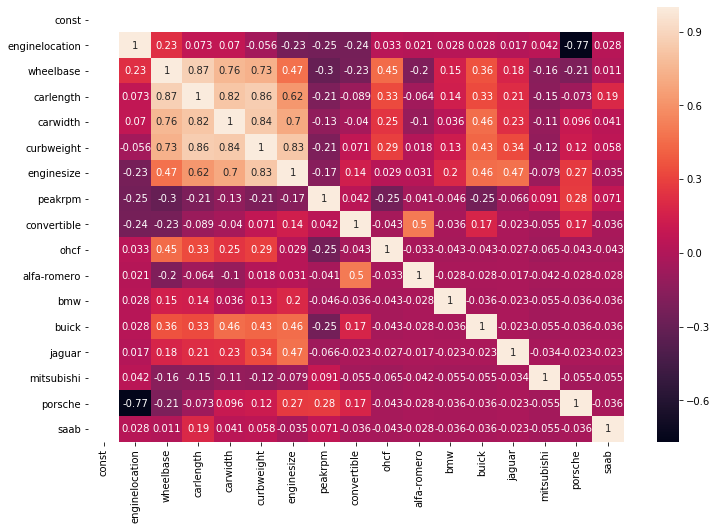

In [247]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train_scaled_sm.corr(),annot=True)

In [248]:
#dropping carlength as it has high vif value

In [249]:
X_train_sm.drop('carlength',axis=1,inplace=True)

In [250]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     161.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.10e-75
Time:                        21:30:34   Log-Likelihood:                -1274.2
No. Observations:                 143   AIC:                             2580.
Df Residuals:                     127   BIC:                             2628.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.358e+04   2089.669      6.499      0.000    9445.123    1.77e+04
enginelocation -1.314e+04   1965.697     -6.685      0.000    -1.7e+04   -9251.876
wheelbase       2401.2125   1811.782      1.325      0.187   -1183.977    5986.402
carwidth        1.118e+04   1892.535      5.910      0.000    7439.376    1.49e+04
curbweight      7905.5259   2145.146      3.685      0.000    3660.670    1.22e+04
enginesize      9953.9737   2635.537      3.777      0.000    4738.722    1.52e+04
peakrpm         3023.5146    999.985      3.024      0.003    1044.726    5002.304
convertible     2730.1339   1125.208      2.426      0.017     503.550    4956.718
ohcf           -2121.3690    947.632     -2.239      0.027   -3996.562    -246.176
alfa-romero     3183.7882   1364.516      2.333      0.021     483.658    5883.918
bmw             9403.6805    979.731      9.598      0.000    7464.970    1.13e+04
buick           8530.9437   1172.455      7.276      0.000    6210.866    1.09e+04
jaguar          7527.6006   1777.429      4.235      0.000    4010.389     1.1e+04
mitsubishi     -1256.0995    617.841     -2.033      0.044   -2478.695     -33.505
porsche         5854.4454   1556.680      3.761      0.000    2774.057    8934.834
saab            1328.9179    895.508      1.484      0.140    -443.131    3100.967
==============================================================================
Omnibus:                       19.144   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.031
Skew:                           0.696   Prob(JB):                     4.97e-07
Kurtosis:                       4.713   Cond. No.                         37.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,172.57
4,curbweight,8.45
5,enginesize,7.09
3,carwidth,5.95
2,wheelbase,5.43
14,porsche,3.23
1,enginelocation,3.14
11,buick,1.83
12,jaguar,1.72
7,convertible,1.69


In [252]:
#dropping wheelbase as it has high vif value

In [253]:
X_train_sm.drop('wheelbase',axis=1,inplace=True)

In [254]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.08e-76
Time:                        21:30:35   Log-Likelihood:                -1275.2
No. Observations:                 143   AIC:                             2580.
Df Residuals:                     128   BIC:                             2625.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.434e+04   2016.467      7.109      0.000    1.03e+04    1.83e+04
enginelocation -1.348e+04   1955.074     -6.893      0.000   -1.73e+04   -9608.762
carwidth        1.231e+04   1695.834      7.260      0.000    8955.575    1.57e+04
curbweight      8984.5463   1990.499      4.514      0.000    5046.004    1.29e+04
enginesize      9111.0038   2565.183      3.552      0.001    4035.351    1.42e+04
peakrpm         2873.3858    996.480      2.884      0.005     901.680    4845.091
convertible     2336.2290   1088.448      2.146      0.034     182.548    4489.909
ohcf           -1717.1120    899.847     -1.908      0.059   -3497.613      63.389
alfa-romero     2907.4484   1352.470      2.150      0.033     231.355    5583.541
bmw             9710.3938    954.815     10.170      0.000    7821.129    1.16e+04
buick           8728.6032   1166.363      7.484      0.000    6420.755     1.1e+04
jaguar          7671.1404   1779.361      4.311      0.000    4150.370    1.12e+04
mitsubishi     -1386.4105    611.767     -2.266      0.025   -2596.895    -175.926
porsche         5158.0828   1469.650      3.510      0.001    2250.129    8066.036
saab            1210.8802    893.698      1.355      0.178    -557.453    2979.213
==============================================================================
Omnibus:                       25.612   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.836
Skew:                           0.833   Prob(JB):                     1.11e-10
Kurtosis:                       5.218   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,159.75
3,curbweight,7.23
4,enginesize,6.67
2,carwidth,4.75
1,enginelocation,3.08
13,porsche,2.86
10,buick,1.80
11,jaguar,1.72
6,convertible,1.57
7,ohcf,1.48


In [256]:
#dropping saab as it has high p value

In [257]:
X_train_sm.drop('saab',axis=1,inplace=True)

In [258]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     184.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.62e-76
Time:                        21:30:35   Log-Likelihood:                -1276.2
No. Observations:                 143   AIC:                             2580.
Df Residuals:                     129   BIC:                             2622.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.437e+04   2022.779      7.106      0.000    1.04e+04    1.84e+04
enginelocation -1.354e+04   1960.842     -6.905      0.000   -1.74e+04   -9660.612
carwidth        1.228e+04   1701.126      7.217      0.000    8910.742    1.56e+04
curbweight      9432.7603   1969.166      4.790      0.000    5536.717    1.33e+04
enginesize      8697.0699   2555.163      3.404      0.001    3641.618    1.38e+04
peakrpm         2946.9333    998.218      2.952      0.004     971.934    4921.932
convertible     2324.7801   1091.935      2.129      0.035     164.359    4485.201
ohcf           -1871.9506    895.448     -2.091      0.039   -3643.616    -100.285
alfa-romero     2854.6737   1356.281      2.105      0.037     171.238    5538.110
bmw             9656.0843    957.059     10.089      0.000    7762.520    1.15e+04
buick           8644.1723   1168.464      7.398      0.000    6332.338     1.1e+04
jaguar          7622.1615   1784.748      4.271      0.000    4090.994    1.12e+04
mitsubishi     -1433.2601    612.764     -2.339      0.021   -2645.629    -220.891
porsche         5079.5968   1473.257      3.448      0.001    2164.721    7994.473
==============================================================================
Omnibus:                       26.533   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.455
Skew:                           0.853   Prob(JB):                     3.01e-11
Kurtosis:                       5.285   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,159.72
3,curbweight,7.03
4,enginesize,6.58
2,carwidth,4.75
1,enginelocation,3.08
13,porsche,2.86
10,buick,1.80
11,jaguar,1.71
6,convertible,1.57
8,alfa-romero,1.47


In [260]:
#dropping curbweigth as it has high vif value

In [261]:
X_train_sm.drop(['curbweight'],axis=1,inplace=True)

In [262]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     169.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.46e-73
Time:                        21:30:36   Log-Likelihood:                -1287.9
No. Observations:                 143   AIC:                             2602.
Df Residuals:                     130   BIC:                             2640.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.513e+04   2180.146      6.941      0.000    1.08e+04    1.94e+04
enginelocation -1.422e+04   2114.324     -6.726      0.000   -1.84e+04      -1e+04
carwidth        1.692e+04   1511.997     11.188      0.000    1.39e+04    1.99e+04
enginesize      1.529e+04   2327.004      6.572      0.000    1.07e+04    1.99e+04
peakrpm         2863.3712   1079.028      2.654      0.009     728.644    4998.098
convertible     2396.7159   1180.400      2.030      0.044      61.435    4731.997
ohcf            -415.8228    910.597     -0.457      0.649   -2217.330    1385.685
alfa-romero     3515.4175   1458.699      2.410      0.017     629.557    6401.278
bmw             9803.3264   1034.160      9.480      0.000    7757.364    1.18e+04
buick           8427.6059   1262.302      6.676      0.000    5930.292    1.09e+04
jaguar          7382.2216   1928.764      3.827      0.000    3566.392    1.12e+04
mitsubishi     -1588.0725    661.549     -2.401      0.018   -2896.868    -279.277
porsche         3987.6412   1573.585      2.534      0.012     874.492    7100.790
==============================================================================
Omnibus:                       14.200   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.836
Skew:                           0.687   Prob(JB):                     0.000364
Kurtosis:                       3.877   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [263]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,158.74
3,enginesize,4.67
2,carwidth,3.21
1,enginelocation,3.07
12,porsche,2.79
9,buick,1.80
10,jaguar,1.71
5,convertible,1.57
7,alfa-romero,1.46
4,peakrpm,1.35


In [264]:
#dropping ohcf as it has high p value

In [265]:
X_train_sm.drop(['ohcf'],axis=1,inplace=True)

In [266]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.54e-74
Time:                        21:30:37   Log-Likelihood:                -1288.0
No. Observations:                 143   AIC:                             2600.
Df Residuals:                     131   BIC:                             2636.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.496e+04   2139.410      6.991      0.000    1.07e+04    1.92e+04
enginelocation -1.407e+04   2081.180     -6.760      0.000   -1.82e+04   -9950.830
carwidth        1.665e+04   1395.137     11.937      0.000    1.39e+04    1.94e+04
enginesize      1.549e+04   2281.732      6.787      0.000     1.1e+04       2e+04
peakrpm         3014.2793   1024.069      2.943      0.004     988.427    5040.131
convertible     2371.6250   1175.553      2.017      0.046      46.100    4697.150
alfa-romero     3520.5955   1454.241      2.421      0.017     643.759    6397.432
bmw             9812.0825   1030.854      9.518      0.000    7772.806    1.19e+04
buick           8547.8564   1230.794      6.945      0.000    6113.052     1.1e+04
jaguar          7400.1002   1922.533      3.849      0.000    3596.872    1.12e+04
mitsubishi     -1584.6880    659.506     -2.403      0.018   -2889.348    -280.028
porsche         4050.6067   1562.789      2.592      0.011     959.037    7142.177
==============================================================================
Omnibus:                       15.275   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.464
Skew:                           0.714   Prob(JB):                     0.000161
Kurtosis:                       3.946   Cond. No.                         30.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,153.79
3,enginesize,4.52
1,enginelocation,2.99
11,porsche,2.77
2,carwidth,2.75
8,buick,1.72
9,jaguar,1.71
5,convertible,1.57
6,alfa-romero,1.46
4,peakrpm,1.22


In [268]:
# evaluation the finally recreated model

## Model Evaluation

### Residual analysis

In [269]:
y_train_predict=model.predict(X_train_scaled_sm)

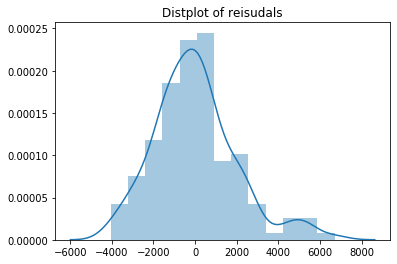

In [270]:
#to check error terms are normal disturbuted of not
plt.title("Distplot of reisudals")
sns.distplot(y_train-y_train_predict)

In [271]:
#by visualizing the graph error terms seems to be normally distributed

Text(0, 0.5, 'residuals')

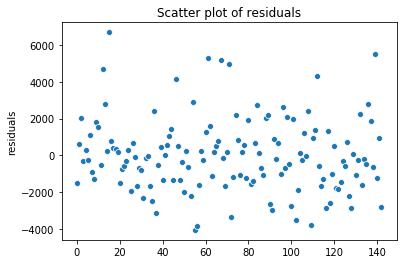

In [272]:
#to check the whether there is any correlation or patterns in error terms
plt.title("Scatter plot of residuals")
sns.scatterplot(np.arange(0,len(y_train_predict)),y_train-y_train_predict)
plt.ylabel('residuals')

Text(0, 0.5, 'predicted values')

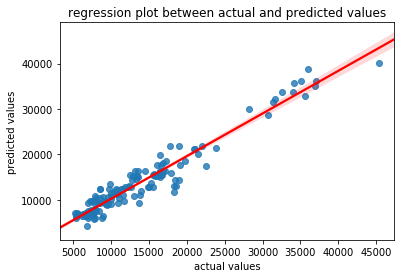

In [273]:
plt.title("regression plot between actual and predicted values")
sns.regplot(y_train,y_train_predict,line_kws={'color':'red'})
plt.xlabel("actual values")
plt.ylabel("predicted values")

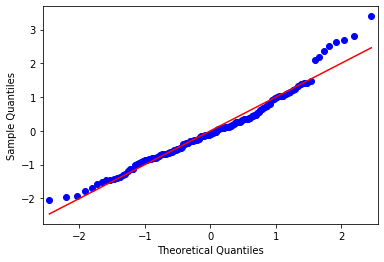

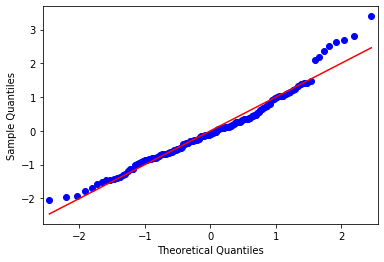

In [274]:
#Q-Q plot to check error terms are normal distributed or not
sm.graphics.qqplot(model.resid,line='s',fit=True)

In [275]:
# Q-Q plots also tell the error terms are normally distributed as it resembles y=x line

In [276]:
#predictors from model
X_train_scaled_sm.columns

Index(['const', 'enginelocation', 'carwidth', 'enginesize', 'peakrpm',
       'convertible', 'alfa-romero', 'bmw', 'buick', 'jaguar', 'mitsubishi',
       'porsche'],
      dtype='object')

In [277]:
Model_features= ['enginelocation', 'carwidth', 'enginesize', 'peakrpm',
       'convertible', 'alfa-romero', 'bmw', 'buick', 'jaguar', 'mitsubishi',
       'porsche']

In [278]:
#model evaluation using test data
X_test_scaled=X_test_scaled[Model_features]

In [279]:
#adding constant to test data since test data has column which are constant so forcifully add constant using has_constant='add'
X_test_scaled_sm=sm.add_constant(X_test_scaled,has_constant='add')

In [280]:
y_predict=model.predict(X_test_scaled_sm)

In [281]:
from sklearn.metrics import r2_score

In [282]:
#r2 score is around 90
r2_score(y_test,y_predict)

0.882556085564954

In [283]:
model.params

const             14957.654662
enginelocation   -14067.899796
carwidth          16654.067906
enginesize        15485.140392
peakrpm            3014.279306
convertible        2371.624995
alfa-romero        3520.595517
bmw                9812.082458
buick              8547.856429
jaguar             7400.100185
mitsubishi        -1584.687978
porsche            4050.606691
dtype: float64

## Model without carname
- Just to check which components of car are driving variables in car price other than brand name

In [284]:
#using features selected by rfe
X_train_withoutcar_scaled=X_train_withoutcar_scaled[final_features_withoutcar]

In [285]:
#adding constant and fitting the model
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [286]:
#viewing the summary of statsmodel
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     65.73
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.99e-58
Time:                        21:30:43   Log-Likelihood:                -1285.6
No. Observations:                 143   AIC:                             2629.
Df Residuals:                     114   BIC:                             2715.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.146e+04   5514.998      3.892      0.000    1.05e+04    3.24e+04
symboling         1999.3559   1152.111      1.735      0.085    -282.967    4281.679
fueltype          -145.4703   3292.085     -0.044      0.965   -6667.066    6376.125
aspiration       -1464.5891   1096.206     -1.336      0.184   -3636.164     706.986
enginelocation   -1.265e+04   2558.756     -4.945      0.000   -1.77e+04   -7584.435
wheelbase         4775.6582   3241.464      1.473      0.143   -1645.657    1.12e+04
carlength        -6302.7823   3347.690     -1.883      0.062   -1.29e+04     328.965
carwidth          9871.7921   2678.629      3.685      0.000    4565.448    1.52e+04
carheight         2897.2689   1551.691      1.867      0.064    -176.620    5971.157
curbweight        7699.0941   3755.961      2.050      0.043     258.565    1.51e+04
cylindernumber    2414.2757   4568.702      0.528      0.598   -6636.288    1.15e+04
enginesize        3.548e+04   5759.756      6.161      0.000    2.41e+04    4.69e+04
boreratio        -4938.1107   2331.535     -2.118      0.036   -9556.863    -319.358
stroke           -8203.8402   1915.891     -4.282      0.000    -1.2e+04   -4408.474
compressionratio -2.571e+04   7560.150     -3.401      0.001   -4.07e+04   -1.07e+04
horsepower       -4880.7987   5153.878     -0.947      0.346   -1.51e+04    5328.994
peakrpm           4949.5011   1844.356      2.684      0.008    1295.846    8603.156
citympg          -2608.0332   6221.504     -0.419      0.676   -1.49e+04    9716.719
highwaympg        5575.0443   5970.730      0.934      0.352   -6252.925    1.74e+04
convertible       3801.1275   1285.008      2.958      0.004    1255.536    6346.719
sedan             1514.0192    452.833      3.343      0.001     616.960    2411.079
rwd               2056.5102    762.982      2.695      0.008     545.048    3567.972
ohc              -5642.7333   3687.191     -1.530      0.129   -1.29e+04    1661.563
ohcf             -9957.2161   4186.427     -2.378      0.019   -1.83e+04   -1663.936
ohcv             -4114.1558   3749.713     -1.097      0.275   -1.15e+04    3313.998
dohc             -4566.7285   3833.938     -1.191      0.236   -1.22e+04    3028.273
l                -8370.4057   3548.641     -2.359      0.020   -1.54e+04   -1340.576
rotor             1854.8641   2309.345      0.803      0.424   -2719.931    6429.659
4bbl              1854.8641   2309.345      0.803      0.424   -2719.931    6429.659
idi               2.161e+04   5155.746      4.191      0.000    1.14e+04    3.18e+04
spdi             -2704.2539   1197.370     -2.258      0.026   -5076.234    -332.274
==============================================================================
Omnibus:                        5.144   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.0

In [287]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
27,rotor,inf
2,fueltype,inf
28,4bbl,inf
29,idi,inf
14,compressionratio,100.76
24,ohcv,88.24
17,citympg,36.91
25,dohc,34.18
18,highwaympg,33.22
22,ohc,26.75


In [288]:
# removing fueltype because of high p value and vif

In [289]:
X_train_withoutcar_scaled.drop('fueltype',axis=1,inplace=True)

In [290]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [291]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     65.73
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.99e-58
Time:                        21:30:44   Log-Likelihood:                -1285.6
No. Observations:                 143   AIC:                             2629.
Df Residuals:                     114   BIC:                             2715.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.132e+04   7478.258      2.851      0.005    6504.639    3.61e+04
symboling         1999.3559   1152.111      1.735      0.085    -282.967    4281.679
aspiration       -1464.5891   1096.206     -1.336      0.184   -3636.164     706.986
enginelocation   -1.265e+04   2558.756     -4.945      0.000   -1.77e+04   -7584.435
wheelbase         4775.6582   3241.464      1.473      0.143   -1645.657    1.12e+04
carlength        -6302.7823   3347.690     -1.883      0.062   -1.29e+04     328.965
carwidth          9871.7921   2678.629      3.685      0.000    4565.448    1.52e+04
carheight         2897.2689   1551.691      1.867      0.064    -176.620    5971.157
curbweight        7699.0941   3755.961      2.050      0.043     258.565    1.51e+04
cylindernumber    2414.2757   4568.702      0.528      0.598   -6636.288    1.15e+04
enginesize        3.548e+04   5759.756      6.161      0.000    2.41e+04    4.69e+04
boreratio        -4938.1107   2331.535     -2.118      0.036   -9556.863    -319.358
stroke           -8203.8402   1915.891     -4.282      0.000    -1.2e+04   -4408.474
compressionratio -2.571e+04   7560.150     -3.401      0.001   -4.07e+04   -1.07e+04
horsepower       -4880.7987   5153.878     -0.947      0.346   -1.51e+04    5328.994
peakrpm           4949.5011   1844.356      2.684      0.008    1295.846    8603.156
citympg          -2608.0332   6221.504     -0.419      0.676   -1.49e+04    9716.719
highwaympg        5575.0443   5970.730      0.934      0.352   -6252.925    1.74e+04
convertible       3801.1275   1285.008      2.958      0.004    1255.536    6346.719
sedan             1514.0192    452.833      3.343      0.001     616.960    2411.079
rwd               2056.5102    762.982      2.695      0.008     545.048    3567.972
ohc              -5642.7333   3687.191     -1.530      0.129   -1.29e+04    1661.563
ohcf             -9957.2161   4186.427     -2.378      0.019   -1.83e+04   -1663.936
ohcv             -4114.1558   3749.713     -1.097      0.275   -1.15e+04    3313.998
dohc             -4566.7285   3833.938     -1.191      0.236   -1.22e+04    3028.273
l                -8370.4057   3548.641     -2.359      0.020   -1.54e+04   -1340.576
rotor             1854.8641   2309.345      0.803      0.424   -2719.931    6429.659
4bbl              1854.8641   2309.345      0.803      0.424   -2719.931    6429.659
idi               2.176e+04   6665.124      3.264      0.001    8551.864     3.5e+04
spdi             -2704.2539   1197.370     -2.258      0.026   -5076.234    -332.274
==============================================================================
Omnibus:                        5.144   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                4.814
Skew:                           0.344   P

In [292]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
26,rotor,inf
27,4bbl,inf
0,const,1691.80
28,idi,111.07
13,compressionratio,100.76
23,ohcv,88.24
16,citympg,36.91
24,dohc,34.18
17,highwaympg,33.22
21,ohc,26.75


In [293]:
# removing 4bbl because of high p value and vif

In [294]:
X_train_withoutcar_scaled.drop('4bbl',axis=1,inplace=True)

In [295]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [296]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     65.73
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.99e-58
Time:                        21:30:46   Log-Likelihood:                -1285.6
No. Observations:                 143   AIC:                             2629.
Df Residuals:                     114   BIC:                             2715.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.132e+04   7478.258      2.851      0.005    6504.639    3.61e+04
symboling         1999.3559   1152.111      1.735      0.085    -282.967    4281.679
aspiration       -1464.5891   1096.206     -1.336      0.184   -3636.164     706.986
enginelocation   -1.265e+04   2558.756     -4.945      0.000   -1.77e+04   -7584.435
wheelbase         4775.6582   3241.464      1.473      0.143   -1645.657    1.12e+04
carlength        -6302.7823   3347.690     -1.883      0.062   -1.29e+04     328.965
carwidth          9871.7921   2678.629      3.685      0.000    4565.448    1.52e+04
carheight         2897.2689   1551.691      1.867      0.064    -176.620    5971.157
curbweight        7699.0941   3755.961      2.050      0.043     258.565    1.51e+04
cylindernumber    2414.2757   4568.702      0.528      0.598   -6636.288    1.15e+04
enginesize        3.548e+04   5759.756      6.161      0.000    2.41e+04    4.69e+04
boreratio        -4938.1107   2331.535     -2.118      0.036   -9556.863    -319.358
stroke           -8203.8402   1915.891     -4.282      0.000    -1.2e+04   -4408.474
compressionratio -2.571e+04   7560.150     -3.401      0.001   -4.07e+04   -1.07e+04
horsepower       -4880.7987   5153.878     -0.947      0.346   -1.51e+04    5328.994
peakrpm           4949.5011   1844.356      2.684      0.008    1295.846    8603.156
citympg          -2608.0332   6221.504     -0.419      0.676   -1.49e+04    9716.719
highwaympg        5575.0443   5970.730      0.934      0.352   -6252.925    1.74e+04
convertible       3801.1275   1285.008      2.958      0.004    1255.536    6346.719
sedan             1514.0192    452.833      3.343      0.001     616.960    2411.079
rwd               2056.5102    762.982      2.695      0.008     545.048    3567.972
ohc              -5642.7333   3687.191     -1.530      0.129   -1.29e+04    1661.563
ohcf             -9957.2161   4186.427     -2.378      0.019   -1.83e+04   -1663.936
ohcv             -4114.1558   3749.713     -1.097      0.275   -1.15e+04    3313.998
dohc             -4566.7285   3833.938     -1.191      0.236   -1.22e+04    3028.273
l                -8370.4057   3548.641     -2.359      0.020   -1.54e+04   -1340.576
rotor             3709.7282   4618.691      0.803      0.424   -5439.863    1.29e+04
idi               2.176e+04   6665.124      3.264      0.001    8551.864     3.5e+04
spdi             -2704.2539   1197.370     -2.258      0.026   -5076.234    -332.274
==============================================================================
Omnibus:                        5.144   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                4.814
Skew:                           0.344   Prob(JB):                       0.0901
Kurtosis:                       3.579   Cond. N

In [297]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,1691.80
27,idi,111.07
13,compressionratio,100.76
23,ohcv,88.24
16,citympg,36.91
24,dohc,34.18
17,highwaympg,33.22
21,ohc,26.75
14,horsepower,25.92
10,enginesize,25.91


In [298]:
# removing citympg because of high p value and vif

In [299]:
X_train_withoutcar_scaled.drop('citympg',axis=1,inplace=True)

In [300]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [301]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     68.65
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.30e-58
Time:                        21:30:47   Log-Likelihood:                -1285.7
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     115   BIC:                             2710.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              2.13e+04   7451.289      2.859      0.005    6541.575    3.61e+04
symboling         2123.2463   1109.561      1.914      0.058     -74.581    4321.074
aspiration       -1278.9374    999.160     -1.280      0.203   -3258.082     700.207
enginelocation   -1.283e+04   2513.428     -5.106      0.000   -1.78e+04   -7854.658
wheelbase         4796.1972   3229.457      1.485      0.140   -1600.736    1.12e+04
carlength        -5993.1210   3253.449     -1.842      0.068   -1.24e+04     451.335
carwidth          9689.7644   2633.709      3.679      0.000    4472.894    1.49e+04
carheight         2781.0758   1521.253      1.828      0.070    -232.233    5794.385
curbweight        7838.1241   3727.857      2.103      0.038     453.957    1.52e+04
cylindernumber    2410.1947   4552.289      0.529      0.598   -6607.014    1.14e+04
enginesize        3.475e+04   5464.584      6.358      0.000    2.39e+04    4.56e+04
boreratio        -4845.2442   2312.653     -2.095      0.038   -9426.166    -264.323
stroke           -8236.8281   1907.402     -4.318      0.000    -1.2e+04   -4458.632
compressionratio -2.662e+04   7215.592     -3.690      0.000   -4.09e+04   -1.23e+04
horsepower       -3990.4078   4678.980     -0.853      0.396   -1.33e+04    5277.751
peakrpm           4801.9193   1803.943      2.662      0.009    1228.656    8375.183
highwaympg        3413.0772   2997.649      1.139      0.257   -2524.689    9350.843
convertible       3801.7660   1280.394      2.969      0.004    1265.552    6337.980
sedan             1544.9271    445.187      3.470      0.001     663.098    2426.756
rwd               2010.2369    752.244      2.672      0.009     520.186    3500.288
ohc              -5773.8326   3660.714     -1.577      0.117    -1.3e+04    1477.337
ohcf             -1.004e+04   4166.882     -2.409      0.018   -1.83e+04   -1785.056
ohcv             -4142.8316   3735.629     -1.109      0.270   -1.15e+04    3256.731
dohc             -4730.4515   3800.300     -1.245      0.216   -1.23e+04    2797.211
l                -8413.4130   3534.422     -2.380      0.019   -1.54e+04   -1412.403
rotor             3703.3008   4602.083      0.805      0.423   -5412.540    1.28e+04
idi               2.251e+04   6395.693      3.519      0.001    9839.435    3.52e+04
spdi             -2710.1571   1192.988     -2.272      0.025   -5073.237    -347.077
==============================================================================
Omnibus:                        5.717   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.484
Skew:                           0.365   Prob(JB):                       0.0644
Kurtosis:                       3.623   Cond. No.                         166.
=====================================================

In [302]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,1691.75
26,idi,103.01
13,compressionratio,92.45
22,ohcv,88.21
23,dohc,33.83
20,ohc,26.56
24,l,24.76
21,ohcf,24.63
10,enginesize,23.49
14,horsepower,21.52


In [303]:
# removing ohcv because of high p value and vif

In [304]:
X_train_withoutcar_scaled.drop('ohcv',axis=1,inplace=True)

In [305]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [306]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     71.10
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.78e-59
Time:                        21:30:48   Log-Likelihood:                -1286.4
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     116   BIC:                             2707.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.483e+04   4635.876      3.198      0.002    5645.727     2.4e+04
symboling         2043.3753   1108.318      1.844      0.068    -151.789    4238.539
aspiration        -891.3231    936.961     -0.951      0.343   -2747.093     964.447
enginelocation   -1.183e+04   2345.804     -5.041      0.000   -1.65e+04   -7179.561
wheelbase         4670.7415   3230.672      1.446      0.151   -1728.012    1.11e+04
carlength        -6650.6148   3202.143     -2.077      0.040    -1.3e+04    -308.368
carwidth          1.023e+04   2590.245      3.951      0.000    5103.127    1.54e+04
carheight         2885.6858   1519.829      1.899      0.060    -124.528    5895.899
curbweight        7909.0492   3731.000      2.120      0.036     519.334    1.53e+04
cylindernumber    4038.5027   4313.275      0.936      0.351   -4504.483    1.26e+04
enginesize        3.224e+04   4978.253      6.475      0.000    2.24e+04    4.21e+04
boreratio        -4113.0717   2218.610     -1.854      0.066   -8507.308     281.164
stroke           -8294.3921   1908.584     -4.346      0.000   -1.21e+04   -4514.201
compressionratio -2.611e+04   7207.672     -3.622      0.000   -4.04e+04   -1.18e+04
horsepower       -1250.4727   3977.456     -0.314      0.754   -9128.326    6627.381
peakrpm           4640.1362   1799.815      2.578      0.011    1075.375    8204.897
highwaympg        4014.9322   2951.034      1.361      0.176   -1829.963    9859.827
convertible       3944.6146   1275.160      3.093      0.002    1419.000    6470.230
sedan             1477.0444    441.395      3.346      0.001     602.806    2351.283
rwd               1852.6773    739.438      2.506      0.014     388.127    3317.227
ohc              -1861.0626    977.065     -1.905      0.059   -3796.263      74.137
ohcf             -5614.9044   1205.313     -4.658      0.000   -8002.178   -3227.630
dohc              -762.4409   1281.992     -0.595      0.553   -3301.588    1776.706
l                -4726.5071   1201.075     -3.935      0.000   -7105.388   -2347.627
rotor             8117.1567   2312.841      3.510      0.001    3536.283    1.27e+04
idi               2.244e+04   6401.688      3.505      0.001    9755.689    3.51e+04
spdi             -2539.4535   1184.188     -2.144      0.034   -4884.888    -194.019
==============================================================================
Omnibus:                        4.881   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.603
Skew:                           0.319   Prob(JB):                        0.100
Kurtosis:                       3.604   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

In [307]:
VIF(X_train_withoutcar_scaled)

,Features,VIF
12,compressionratio,150.59
24,idi,113.14
8,cylindernumber,86.82
4,carlength,83.51
2,enginelocation,76.88
7,curbweight,76.33
3,wheelbase,68.96
9,enginesize,58.40
10,boreratio,51.85
13,horsepower,38.64


In [308]:
# removing horsepower because of high p value and vif

In [309]:
X_train_withoutcar_scaled.drop('horsepower',axis=1,inplace=True)

In [310]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [311]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     74.51
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.34e-60
Time:                        21:30:49   Log-Likelihood:                -1286.5
No. Observations:                 143   AIC:                             2625.
Df Residuals:                     117   BIC:                             2702.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.478e+04   4615.926      3.203      0.002    5642.508    2.39e+04
symboling         2068.0377   1101.273      1.878      0.063    -112.975    4249.051
aspiration        -730.3557    781.672     -0.934      0.352   -2278.416     817.705
enginelocation   -1.172e+04   2310.505     -5.071      0.000   -1.63e+04   -7139.660
wheelbase         5028.4064   3012.072      1.669      0.098    -936.845     1.1e+04
carlength        -6686.4855   3187.762     -2.098      0.038    -1.3e+04    -373.291
carwidth          1.009e+04   2538.883      3.973      0.000    5060.072    1.51e+04
carheight         2884.5758   1513.961      1.905      0.059    -113.744    5882.896
curbweight        7736.7860   3676.307      2.104      0.037     456.054     1.5e+04
cylindernumber    3461.3546   3888.052      0.890      0.375   -4238.730    1.12e+04
enginesize        3.182e+04   4779.800      6.657      0.000    2.24e+04    4.13e+04
boreratio        -4388.1076   2030.984     -2.161      0.033   -8410.364    -365.851
stroke           -8200.6457   1877.873     -4.367      0.000   -1.19e+04   -4481.617
compressionratio -2.629e+04   7156.014     -3.674      0.000   -4.05e+04   -1.21e+04
peakrpm           4420.7492   1652.630      2.675      0.009    1147.802    7693.697
highwaympg        4086.0405   2931.001      1.394      0.166   -1718.653    9890.734
convertible       4041.7901   1232.358      3.280      0.001    1601.169    6482.411
sedan             1483.9914    439.141      3.379      0.001     614.296    2353.687
rwd               1827.4223    732.225      2.496      0.014     377.289    3277.556
ohc              -1887.0610    969.803     -1.946      0.054   -3807.704      33.582
ohcf             -5607.0938   1200.407     -4.671      0.000   -7984.437   -3229.750
dohc              -670.0935   1243.073     -0.539      0.591   -3131.933    1791.747
l                -4619.1722   1147.087     -4.027      0.000   -6890.919   -2347.426
rotor             7941.0199   2235.301      3.553      0.001    3514.123    1.24e+04
idi               2.272e+04   6311.308      3.600      0.000    1.02e+04    3.52e+04
spdi             -2551.4671   1179.005     -2.164      0.032   -4886.424    -216.510
==============================================================================
Omnibus:                        4.745   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.493
Skew:                           0.307   Prob(JB):                        0.106
Kurtosis:                       3.615   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,652.96
24,idi,100.88
13,compressionratio,91.45
8,curbweight,19.24
10,enginesize,18.08
5,carlength,12.66
4,wheelbase,11.65
9,cylindernumber,10.84
6,carwidth,8.31
15,highwaympg,8.11


In [313]:
#plotting heatmap to check the correlation between dependent variables

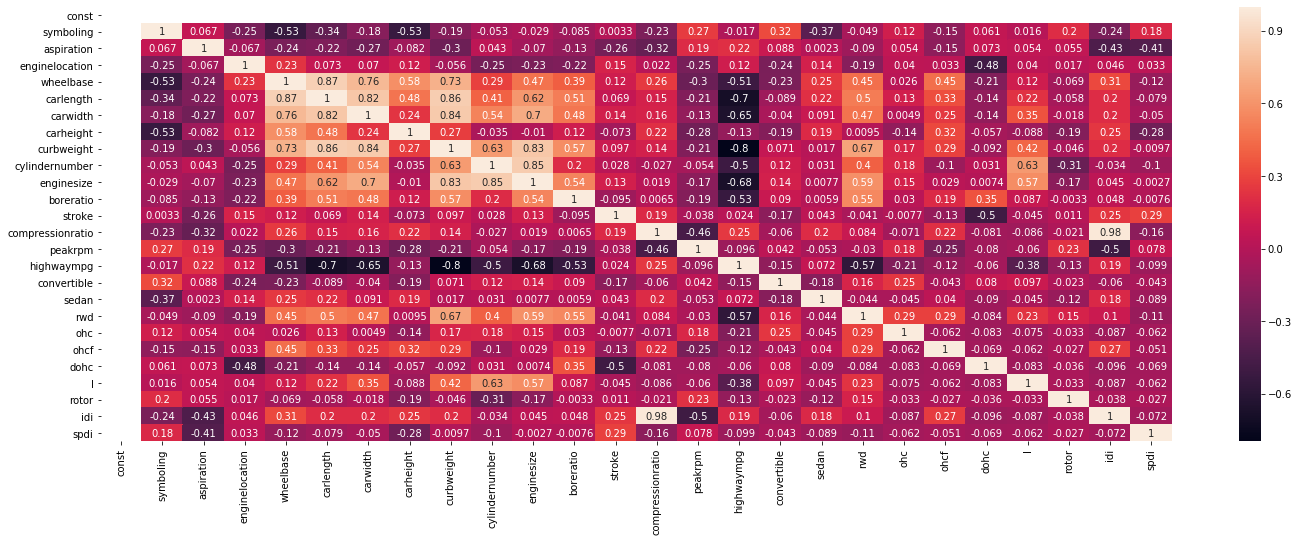

In [314]:
plt.figure(figsize=(24,8))
sns.heatmap(X_train_withoutcar_scaled_sm.corr(),annot=True)

In [315]:
# removing dohc because of high p value

In [316]:
X_train_withoutcar_scaled.drop('dohc',axis=1,inplace=True)

In [317]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [318]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     78.07
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.31e-61
Time:                        21:30:52   Log-Likelihood:                -1286.7
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     118   BIC:                             2697.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.366e+04   4107.957      3.326      0.001    5527.596    2.18e+04
symboling         2110.2401   1095.180      1.927      0.056     -58.514    4278.994
aspiration        -753.1751    778.175     -0.968      0.335   -2294.174     787.824
enginelocation   -1.111e+04   2016.892     -5.510      0.000   -1.51e+04   -7119.780
wheelbase         4870.6848   2988.803      1.630      0.106   -1047.959    1.08e+04
carlength        -6323.3954   3106.409     -2.036      0.044   -1.25e+04    -171.860
carwidth          1.008e+04   2531.168      3.982      0.000    5065.481    1.51e+04
carheight         3005.6464   1492.702      2.014      0.046      49.691    5961.602
curbweight        7834.2274   3660.806      2.140      0.034     584.835    1.51e+04
cylindernumber    3045.8274   3799.402      0.802      0.424   -4478.024    1.06e+04
enginesize        3.234e+04   4668.192      6.927      0.000    2.31e+04    4.16e+04
boreratio        -4937.2777   1751.708     -2.819      0.006   -8406.137   -1468.418
stroke           -7713.2777   1640.950     -4.700      0.000    -1.1e+04   -4463.750
compressionratio -2.622e+04   7133.184     -3.675      0.000   -4.03e+04   -1.21e+04
peakrpm           4694.1288   1568.159      2.993      0.003    1588.747    7799.511
highwaympg        4539.9450   2798.995      1.622      0.107   -1002.827    1.01e+04
convertible       4162.1983   1208.298      3.445      0.001    1769.439    6554.957
sedan             1485.7589    437.806      3.394      0.001     618.783    2352.735
rwd               1994.1800    661.672      3.014      0.003     683.890    3304.470
ohc              -1956.0342    958.431     -2.041      0.043   -3853.988     -58.080
ohcf             -5546.8797   1191.601     -4.655      0.000   -7906.573   -3187.186
l                -4586.0927   1141.996     -4.016      0.000   -6847.557   -2324.629
rotor             7861.1522   2223.671      3.535      0.001    3457.678    1.23e+04
idi               2.259e+04   6287.261      3.592      0.000    1.01e+04     3.5e+04
spdi             -2552.4573   1175.454     -2.171      0.032   -4880.176    -224.739
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.050
Skew:                           0.319   Prob(JB):                       0.0801
Kurtosis:                       3.664   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [319]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,520.29
23,idi,100.72
13,compressionratio,91.42
8,curbweight,19.20
10,enginesize,17.35
5,carlength,12.10
4,wheelbase,11.54
9,cylindernumber,10.42
6,carwidth,8.31
15,highwaympg,7.44


In [320]:
# removing idi because of high vif

In [321]:
X_train_withoutcar_scaled.drop('idi',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [322]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     73.55
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.10e-59
Time:                        21:30:52   Log-Likelihood:                -1294.1
No. Observations:                 143   AIC:                             2636.
Df Residuals:                     119   BIC:                             2707.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.328e+04   4307.087      3.083      0.003    4748.173    2.18e+04
symboling         1797.9942   1145.037      1.570      0.119    -469.294    4065.282
aspiration       -1819.4621    754.475     -2.412      0.017   -3313.398    -325.526
enginelocation   -1.166e+04   2109.298     -5.529      0.000   -1.58e+04   -7486.313
wheelbase         5963.9306   3118.464      1.912      0.058    -210.939    1.21e+04
carlength        -7586.9484   3237.152     -2.344      0.021    -1.4e+04   -1177.063
carwidth          1.021e+04   2654.494      3.846      0.000    4953.272    1.55e+04
carheight         3206.4839   1564.496      2.050      0.043     108.626    6304.342
curbweight        8391.4031   3836.126      2.187      0.031     795.491     1.6e+04
cylindernumber    2153.3011   3976.409      0.542      0.589   -5720.386       1e+04
enginesize        3.071e+04   4873.137      6.302      0.000    2.11e+04    4.04e+04
boreratio        -4710.8619   1836.060     -2.566      0.012   -8346.444   -1075.280
stroke           -5458.7096   1590.240     -3.433      0.001   -8607.545   -2309.875
compressionratio  -956.2494   1258.236     -0.760      0.449   -3447.683    1535.185
peakrpm           2827.5262   1551.831      1.822      0.071    -245.255    5900.307
highwaympg        2100.0627   2847.945      0.737      0.462   -3539.154    7739.279
convertible       4883.7851   1249.670      3.908      0.000    2409.314    7358.256
sedan             1414.4156    458.713      3.083      0.003     506.118    2322.714
rwd               1844.6422    692.609      2.663      0.009     473.208    3216.076
ohc              -2073.4574   1004.649     -2.064      0.041   -4062.763     -84.152
ohcf             -4670.1024   1223.295     -3.818      0.000   -7092.349   -2247.856
l                -4389.5342   1196.388     -3.669      0.000   -6758.502   -2020.567
rotor             6960.0940   2317.375      3.003      0.003    2371.459    1.15e+04
spdi             -1251.3183   1172.872     -1.067      0.288   -3573.723    1071.086
==============================================================================
Omnibus:                        3.992   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.336
Skew:                           0.165   Prob(JB):                        0.114
Kurtosis:                       3.787   Cond. No.                         82.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,519.93
8,curbweight,19.16
10,enginesize,17.18
5,carlength,11.94
4,wheelbase,11.42
9,cylindernumber,10.37
6,carwidth,8.31
15,highwaympg,7.00
11,boreratio,3.55
18,rwd,3.18


In [324]:
# removing cylindernumber because of high p value and vif

In [325]:
X_train_withoutcar_scaled.drop('cylindernumber',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [326]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     77.33
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.72e-60
Time:                        21:30:52   Log-Likelihood:                -1294.3
No. Observations:                 143   AIC:                             2635.
Df Residuals:                     120   BIC:                             2703.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.476e+04   3308.842      4.462      0.000    8212.093    2.13e+04
symboling         1691.6779   1124.753      1.504      0.135    -535.255    3918.611
aspiration       -1760.7312    744.437     -2.365      0.020   -3234.665    -286.798
enginelocation   -1.203e+04   1990.311     -6.045      0.000    -1.6e+04   -8091.258
wheelbase         5877.9269   3105.232      1.893      0.061    -270.216     1.2e+04
carlength        -8092.3407   3090.557     -2.618      0.010   -1.42e+04   -1973.253
carwidth          1.066e+04   2511.946      4.245      0.000    5688.728    1.56e+04
carheight         3244.3717   1558.321      2.082      0.039     159.004    6329.740
curbweight        8522.8191   3817.151      2.233      0.027     965.125    1.61e+04
enginesize         3.22e+04   4017.825      8.013      0.000    2.42e+04    4.02e+04
boreratio        -5310.8962   1459.692     -3.638      0.000   -8200.984   -2420.808
stroke           -5626.8888   1555.019     -3.619      0.000   -8705.719   -2548.059
compressionratio  -953.8307   1254.518     -0.760      0.449   -3437.689    1530.027
peakrpm           2749.9307   1540.644      1.785      0.077    -300.438    5800.299
highwaympg        1821.8251   2792.952      0.652      0.515   -3708.025    7351.675
convertible       4755.3640   1223.343      3.887      0.000    2333.230    7177.498
sedan             1450.9591    452.384      3.207      0.002     555.270    2346.648
rwd               1878.0930    687.814      2.731      0.007     516.269    3239.917
ohc              -1943.2831    972.589     -1.998      0.048   -3868.942     -17.624
ohcf             -4790.9725   1199.212     -3.995      0.000   -7165.329   -2416.616
l                -4240.5984   1160.912     -3.653      0.000   -6539.123   -1942.074
rotor             6426.6394   2091.382      3.073      0.003    2285.849    1.06e+04
spdi             -1311.0562   1164.229     -1.126      0.262   -3616.149     994.037
==============================================================================
Omnibus:                        3.163   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                3.205
Skew:                           0.120   Prob(JB):                        0.201
Kurtosis:                       3.693   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,308.67
8,curbweight,19.09
9,enginesize,11.75
4,wheelbase,11.39
5,carlength,10.95
6,carwidth,7.48
14,highwaympg,6.78
17,rwd,3.16
7,carheight,3.05
12,compressionratio,2.59


In [328]:
# removing highwaympg because of high p value and vif

In [329]:
X_train_withoutcar_scaled.drop('highwaympg',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [330]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     81.38
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.67e-61
Time:                        21:30:53   Log-Likelihood:                -1294.5
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     121   BIC:                             2698.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.592e+04   2789.555      5.706      0.000    1.04e+04    2.14e+04
symboling         1572.8319   1107.260      1.420      0.158    -619.282    3764.945
aspiration       -1620.4508    711.003     -2.279      0.024   -3028.069    -212.833
enginelocation   -1.199e+04   1984.695     -6.043      0.000   -1.59e+04   -8063.946
wheelbase         5727.5427   3089.301      1.854      0.066    -388.544    1.18e+04
carlength        -8506.5803   3017.419     -2.819      0.006   -1.45e+04   -2532.803
carwidth          1.091e+04   2476.930      4.405      0.000    6007.216    1.58e+04
carheight         3183.7367   1551.849      2.052      0.042     111.442    6256.031
curbweight        7704.3065   3596.437      2.142      0.034     584.211    1.48e+04
enginesize        3.203e+04   3999.833      8.007      0.000    2.41e+04    3.99e+04
boreratio        -5441.0889   1442.545     -3.772      0.000   -8296.987   -2585.191
stroke           -5492.2317   1537.592     -3.572      0.001   -8536.302   -2448.162
compressionratio  -535.6968   1075.819     -0.498      0.619   -2665.564    1594.170
peakrpm           2556.5309   1508.252      1.695      0.093    -429.452    5542.514
convertible       4630.2327   1205.337      3.841      0.000    2243.950    7016.515
sedan             1455.2956    451.260      3.225      0.002     561.907    2348.684
rwd               1889.3166    685.964      2.754      0.007     531.269    3247.364
ohc              -1968.1070    969.534     -2.030      0.045   -3887.556     -48.658
ohcf             -4699.7134   1188.192     -3.955      0.000   -7052.053   -2347.373
l                -4331.8755   1149.708     -3.768      0.000   -6608.026   -2055.725
rotor             5986.6241   1974.901      3.031      0.003    2076.787    9896.461
spdi             -1341.4274   1160.533     -1.156      0.250   -3639.008     956.154
==============================================================================
Omnibus:                        3.385   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                3.506
Skew:                           0.132   Prob(JB):                        0.173
Kurtosis:                       3.720   Cond. No.                         65.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [331]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,220.43
8,curbweight,17.02
9,enginesize,11.70
4,wheelbase,11.33
5,carlength,10.49
6,carwidth,7.31
16,rwd,3.15
7,carheight,3.04
19,l,2.44
3,enginelocation,2.29


In [332]:
# removing compressionratio because of high p value

In [333]:
X_train_withoutcar_scaled.drop('compressionratio',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [334]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     85.97
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.40e-62
Time:                        21:30:54   Log-Likelihood:                -1294.7
No. Observations:                 143   AIC:                             2631.
Df Residuals:                     122   BIC:                             2694.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.537e+04   2551.720      6.021      0.000    1.03e+04    2.04e+04
symboling       1606.0298   1101.839      1.458      0.148    -575.171    3787.231
aspiration     -1535.2234    687.964     -2.232      0.027   -2897.117    -173.330
enginelocation -1.173e+04   1909.680     -6.145      0.000   -1.55e+04   -7954.264
wheelbase       5710.5102   3079.576      1.854      0.066    -385.818    1.18e+04
carlength      -8338.8840   2989.310     -2.790      0.006   -1.43e+04   -2421.247
carwidth        1.071e+04   2434.913      4.397      0.000    5885.729    1.55e+04
carheight       3177.8573   1547.014      2.054      0.042     115.389    6240.326
curbweight      7646.9029   3583.493      2.134      0.035     553.021    1.47e+04
enginesize      3.228e+04   3955.940      8.159      0.000    2.44e+04    4.01e+04
boreratio      -5326.0919   1419.543     -3.752      0.000   -8136.219   -2515.965
stroke         -5666.7570   1492.491     -3.797      0.000   -8621.292   -2712.222
peakrpm         2912.3028   1324.184      2.199      0.030     290.948    5533.658
convertible     4622.3242   1201.512      3.847      0.000    2243.811    7000.837
sedan           1404.0567    438.015      3.206      0.002     536.963    2271.151
rwd             1858.8447    681.120      2.729      0.007     510.499    3207.190
ohc            -2012.7367    962.403     -2.091      0.039   -3917.909    -107.565
ohcf           -4723.8095   1183.542     -3.991      0.000   -7066.748   -2380.871
l              -4327.6061   1146.127     -3.776      0.000   -6596.479   -2058.733
rotor           5904.9371   1962.000      3.010      0.003    2020.962    9788.912
spdi           -1208.6983   1126.020     -1.073      0.285   -3437.767    1020.371
==============================================================================
Omnibus:                        3.502   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.741
Skew:                           0.123   Prob(JB):                        0.154
Kurtosis:                       3.753   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [335]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,185.59
8,curbweight,17.01
9,enginesize,11.52
4,wheelbase,11.32
5,carlength,10.35
6,carwidth,7.11
15,rwd,3.13
7,carheight,3.04
18,l,2.44
1,symboling,2.27


In [336]:
# removing spdi because of high p value 

In [337]:
X_train_withoutcar_scaled.drop('spdi',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [338]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     90.32
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.04e-63
Time:                        21:30:55   Log-Likelihood:                -1295.4
No. Observations:                 143   AIC:                             2631.
Df Residuals:                     123   BIC:                             2690.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.554e+04   2548.207      6.098      0.000    1.05e+04    2.06e+04
symboling       1506.3778   1098.601      1.371      0.173    -668.235    3680.991
aspiration     -1244.8183    632.928     -1.967      0.051   -2497.660       8.023
enginelocation -1.204e+04   1889.563     -6.372      0.000   -1.58e+04   -8299.595
wheelbase       5541.1598   3077.435      1.801      0.074    -550.434    1.16e+04
carlength      -8636.4742   2978.268     -2.900      0.004   -1.45e+04   -2741.176
carwidth        1.146e+04   2332.776      4.913      0.000    6842.511    1.61e+04
carheight       3650.6010   1483.919      2.460      0.015     713.274    6587.928
curbweight      7377.2743   3576.890      2.062      0.041     297.040    1.45e+04
enginesize      3.189e+04   3941.761      8.089      0.000    2.41e+04    3.97e+04
boreratio      -5454.9352   1415.334     -3.854      0.000   -8256.502   -2653.368
stroke         -5897.5983   1477.830     -3.991      0.000   -8822.873   -2972.324
peakrpm         2581.6875   1288.663      2.003      0.047      30.858    5132.517
convertible     4623.5367   1202.255      3.846      0.000    2243.747    7003.326
sedan           1439.5280    437.037      3.294      0.001     574.440    2304.615
rwd             2004.1872    667.939      3.001      0.003     682.042    3326.332
ohc            -1817.7330    945.686     -1.922      0.057   -3689.661      54.194
ohcf           -4810.0756   1181.541     -4.071      0.000   -7148.863   -2471.289
l              -4215.3042   1142.048     -3.691      0.000   -6475.919   -1954.689
rotor           6055.4224   1958.196      3.092      0.002    2179.294    9931.551
==============================================================================
Omnibus:                        3.307   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                3.331
Skew:                           0.143   Prob(JB):                        0.189
Kurtosis:                       3.691   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,184.85
8,curbweight,16.92
9,enginesize,11.42
4,wheelbase,11.29
5,carlength,10.27
6,carwidth,6.52
15,rwd,3.01
7,carheight,2.79
18,l,2.41
1,symboling,2.25


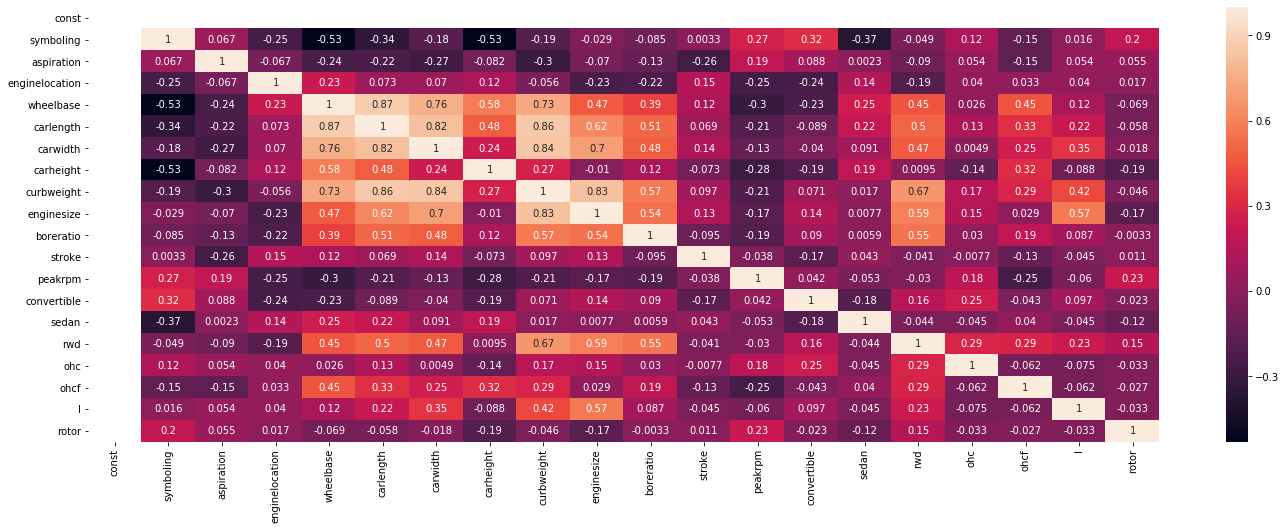

In [340]:
plt.figure(figsize=(24,8))
sns.heatmap(X_train_withoutcar_scaled_sm.corr(),annot=True)

In [341]:
# removing wheelbase because of high vif and p value

In [342]:
X_train_withoutcar_scaled.drop('wheelbase',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     93.47
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.99e-63
Time:                        21:30:57   Log-Likelihood:                -1297.2
No. Observations:                 143   AIC:                             2632.
Df Residuals:                     124   BIC:                             2689.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.513e+04   2560.833      5.907      0.000    1.01e+04    2.02e+04
symboling        648.5225    998.826      0.649      0.517   -1328.434    2625.479
aspiration     -1294.7591    638.010     -2.029      0.045   -2557.561     -31.958
enginelocation -1.108e+04   1829.048     -6.058      0.000   -1.47e+04   -7459.357
carlength      -6160.4327   2665.571     -2.311      0.022   -1.14e+04    -884.522
carwidth        1.313e+04   2160.388      6.076      0.000    8851.402    1.74e+04
carheight       4624.0136   1394.377      3.316      0.001    1864.152    7383.876
curbweight      6295.4621   3557.804      1.769      0.079    -746.429    1.33e+04
enginesize      3.327e+04   3900.817      8.529      0.000    2.56e+04     4.1e+04
boreratio      -5909.5451   1405.166     -4.206      0.000   -8690.763   -3128.328
stroke         -5593.9178   1481.388     -3.776      0.000   -8526.001   -2661.835
peakrpm         2401.7756   1296.347      1.853      0.066    -164.058    4967.609
convertible     4276.7913   1197.412      3.572      0.001    1906.777    6646.805
sedan           1424.5635    440.890      3.231      0.002     551.918    2297.209
rwd             2352.0964    645.136      3.646      0.000    1075.192    3629.001
ohc            -1828.7559    954.177     -1.917      0.058   -3717.340      59.828
ohcf           -3999.8170   1102.325     -3.629      0.000   -6181.626   -1818.008
l              -4698.0309   1120.126     -4.194      0.000   -6915.074   -2480.987
rotor           6449.6581   1963.430      3.285      0.001    2563.480    1.03e+04
==============================================================================
Omnibus:                        4.185   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                4.926
Skew:                           0.129   Prob(JB):                       0.0852
Kurtosis:                       3.872   Cond. No.                         59.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,183.37
7,curbweight,16.45
8,enginesize,10.99
4,carlength,8.08
5,carwidth,5.49
14,rwd,2.75
6,carheight,2.42
17,l,2.28
9,boreratio,2.07
3,enginelocation,1.92


In [344]:
# removing symboling because of high p value

In [345]:
X_train_withoutcar_scaled.drop(['symboling'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     99.40
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.84e-64
Time:                        21:30:57   Log-Likelihood:                -1297.5
No. Observations:                 143   AIC:                             2631.
Df Residuals:                     125   BIC:                             2684.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.578e+04   2349.017      6.718      0.000    1.11e+04    2.04e+04
aspiration     -1322.9789    635.054     -2.083      0.039   -2579.829     -66.128
enginelocation -1.122e+04   1811.870     -6.193      0.000   -1.48e+04   -7634.820
carlength      -6137.6604   2659.166     -2.308      0.023   -1.14e+04    -874.841
carwidth         1.32e+04   2152.672      6.131      0.000    8937.359    1.75e+04
carheight       4359.0705   1330.245      3.277      0.001    1726.350    6991.791
curbweight      6021.0178   3524.423      1.708      0.090    -954.253     1.3e+04
enginesize      3.351e+04   3874.512      8.649      0.000    2.58e+04    4.12e+04
boreratio      -5903.0259   1401.875     -4.211      0.000   -8677.511   -3128.540
stroke         -5563.6828   1477.227     -3.766      0.000   -8487.298   -2640.068
peakrpm         2483.7327   1287.198      1.930      0.056     -63.792    5031.257
convertible     4456.7295   1162.202      3.835      0.000    2156.587    6756.872
sedan           1341.7377    421.055      3.187      0.002     508.417    2175.058
rwd             2299.6955    638.585      3.601      0.000    1035.856    3563.535
ohc            -1773.7613    948.209     -1.871      0.064   -3650.385     102.862
ohcf           -3908.6020   1090.803     -3.583      0.000   -6067.437   -1749.767
l              -4694.9136   1117.521     -4.201      0.000   -6906.627   -2483.200
rotor           6665.5545   1930.587      3.453      0.001    2844.684    1.05e+04
==============================================================================
Omnibus:                        5.143   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                6.592
Skew:                           0.160   Prob(JB):                       0.0370
Kurtosis:                       4.002   Cond. No.                         57.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,155.01
6,curbweight,16.21
7,enginesize,10.89
3,carlength,8.08
4,carwidth,5.48
13,rwd,2.71
16,l,2.28
5,carheight,2.21
8,boreratio,2.07
2,enginelocation,1.89


In [347]:
# removing curbweight because of high p value and vif

In [348]:
X_train_withoutcar_scaled.drop(['curbweight'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.95e-64
Time:                        21:30:58   Log-Likelihood:                -1299.1
No. Observations:                 143   AIC:                             2632.
Df Residuals:                     126   BIC:                             2683.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.552e+04   2361.617      6.570      0.000    1.08e+04    2.02e+04
aspiration     -1813.9191    570.608     -3.179      0.002   -2943.135    -684.703
enginelocation -1.089e+04   1815.156     -5.999      0.000   -1.45e+04   -7297.784
carlength      -4000.2568   2364.245     -1.692      0.093   -8679.028     678.515
carwidth        1.397e+04   2120.621      6.588      0.000    9773.501    1.82e+04
carheight       4928.9704   1297.504      3.799      0.000    2361.248    7496.693
enginesize       3.72e+04   3239.127     11.486      0.000    3.08e+04    4.36e+04
boreratio      -5958.9605   1412.123     -4.220      0.000   -8753.510   -3164.411
stroke         -5694.9028   1486.417     -3.831      0.000   -8636.479   -2753.327
peakrpm         2555.6206   1296.267      1.972      0.051      -9.655    5120.896
convertible     4725.9141   1160.205      4.073      0.000    2429.903    7021.925
sedan           1154.5572    409.633      2.819      0.006     343.906    1965.209
rwd             2621.0969    614.872      4.263      0.000    1404.284    3837.910
ohc            -1617.1822    950.927     -1.701      0.091   -3499.039     264.674
ohcf           -3540.6804   1077.442     -3.286      0.001   -5672.906   -1408.455
l              -4555.8134   1123.004     -4.057      0.000   -6778.206   -2333.421
rotor           7263.4904   1912.995      3.797      0.000    3477.730     1.1e+04
==============================================================================
Omnibus:                        2.087   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                1.841
Skew:                           0.001   Prob(JB):                        0.398
Kurtosis:                       3.556   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [349]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,154.33
6,enginesize,7.50
3,carlength,6.29
4,carwidth,5.23
12,rwd,2.48
15,l,2.27
5,carheight,2.07
7,boreratio,2.07
2,enginelocation,1.87
13,ohc,1.63


In [350]:
# removing carlength because of VIF and p value

In [351]:
X_train_withoutcar_scaled.drop(['carlength'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.45e-65
Time:                        21:30:58   Log-Likelihood:                -1300.7
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     127   BIC:                             2681.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.559e+04   2378.417      6.556      0.000    1.09e+04    2.03e+04
aspiration     -1768.4288    574.139     -3.080      0.003   -2904.546    -632.312
enginelocation -1.115e+04   1821.778     -6.121      0.000   -1.48e+04   -7546.499
carwidth        1.196e+04   1767.423      6.764      0.000    8457.642    1.55e+04
carheight       3706.3844   1085.557      3.414      0.001    1558.262    5854.507
enginesize      3.597e+04   3178.277     11.316      0.000    2.97e+04    4.23e+04
boreratio      -6252.8767   1411.638     -4.430      0.000   -9046.253   -3459.501
stroke         -5584.5212   1495.836     -3.733      0.000   -8544.510   -2624.532
peakrpm         2552.9333   1305.739      1.955      0.053     -30.888    5136.754
convertible     4951.3640   1160.949      4.265      0.000    2654.055    7248.673
sedan            990.7610    400.938      2.471      0.015     197.377    1784.145
rwd             2557.9505    618.223      4.138      0.000    1334.599    3781.302
ohc            -2071.8587    918.833     -2.255      0.026   -3890.063    -253.655
ohcf           -3786.9365   1075.367     -3.522      0.001   -5914.894   -1658.979
l              -4355.7318   1124.921     -3.872      0.000   -6581.748   -2129.716
rotor           6818.9323   1908.711      3.573      0.001    3041.937    1.06e+04
==============================================================================
Omnibus:                        2.818   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.904
Skew:                           0.012   Prob(JB):                        0.234
Kurtosis:                       3.698   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [352]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,154.27
5,enginesize,7.11
3,carwidth,3.58
11,rwd,2.47
14,l,2.24
6,boreratio,2.04
2,enginelocation,1.86
8,peakrpm,1.61
12,ohc,1.50
13,ohcf,1.47


In [353]:
# removing peakrpm because of high p value

In [354]:
X_train_withoutcar_scaled.drop(['peakrpm'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.43e-65
Time:                        21:30:59   Log-Likelihood:                -1302.8
No. Observations:                 143   AIC:                             2636.
Df Residuals:                     128   BIC:                             2680.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.818e+04   1996.680      9.107      0.000    1.42e+04    2.21e+04
aspiration     -1539.2061    568.204     -2.709      0.008   -2663.496    -414.916
enginelocation -1.269e+04   1660.910     -7.641      0.000    -1.6e+04   -9404.290
carwidth         1.31e+04   1686.524      7.765      0.000    9759.347    1.64e+04
carheight       3251.1934   1071.925      3.033      0.003    1130.206    5372.181
enginesize      3.377e+04   3006.669     11.233      0.000    2.78e+04    3.97e+04
boreratio      -6560.9644   1418.198     -4.626      0.000   -9367.112   -3754.817
stroke         -5415.9825   1509.726     -3.587      0.000   -8403.233   -2428.732
convertible     4739.7837   1168.570      4.056      0.000    2427.568    7051.999
sedan           1025.2747    404.942      2.532      0.013     224.029    1826.521
rwd             2687.0928    621.425      4.324      0.000    1457.498    3916.688
ohc            -1596.5374    895.804     -1.782      0.077   -3369.039     175.964
ohcf           -4278.3588   1057.047     -4.047      0.000   -6369.907   -2186.811
l              -4015.4878   1123.567     -3.574      0.000   -6238.656   -1792.320
rotor           7059.6123   1925.625      3.666      0.000    3249.435    1.09e+04
==============================================================================
Omnibus:                        3.171   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                3.226
Skew:                           0.118   Prob(JB):                        0.199
Kurtosis:                       3.697   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,106.38
5,enginesize,6.23
3,carwidth,3.19
10,rwd,2.44
13,l,2.19
6,boreratio,2.01
2,enginelocation,1.51
11,ohc,1.39
12,ohcf,1.39
4,carheight,1.37


In [356]:
# removing ohc because of high p value

In [357]:
X_train_withoutcar_scaled.drop(['ohc'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.87e-65
Time:                        21:31:00   Log-Likelihood:                -1304.6
No. Observations:                 143   AIC:                             2637.
Df Residuals:                     129   BIC:                             2679.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.853e+04   2003.812      9.249      0.000    1.46e+04    2.25e+04
aspiration     -1560.4619    572.851     -2.724      0.007   -2693.862    -427.061
enginelocation -1.345e+04   1619.091     -8.306      0.000   -1.67e+04   -1.02e+04
carwidth        1.346e+04   1688.428      7.970      0.000    1.01e+04    1.68e+04
carheight       3400.3702   1077.629      3.155      0.002    1268.254    5532.486
enginesize      3.269e+04   2969.403     11.009      0.000    2.68e+04    3.86e+04
boreratio      -6057.1223   1401.410     -4.322      0.000   -8829.847   -3284.398
stroke         -5190.0296   1517.031     -3.421      0.001   -8191.512   -2188.548
convertible     4306.9902   1152.662      3.737      0.000    2026.420    6587.561
sedan           1038.3170    408.277      2.543      0.012     230.532    1846.102
rwd             2350.9622    597.088      3.937      0.000    1169.610    3532.315
ohcf           -4075.7180   1059.742     -3.846      0.000   -6172.444   -1978.992
l              -3408.1927   1079.644     -3.157      0.002   -5544.295   -1272.090
rotor           7258.6726   1938.531      3.744      0.000    3423.241    1.11e+04
==============================================================================
Omnibus:                        2.643   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.611
Skew:                           0.040   Prob(JB):                        0.271
Kurtosis:                       3.657   Cond. No.                         37.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,105.36
5,enginesize,5.97
3,carwidth,3.15
10,rwd,2.21
12,l,1.99
6,boreratio,1.93
2,enginelocation,1.41
11,ohcf,1.37
4,carheight,1.36
13,rotor,1.36


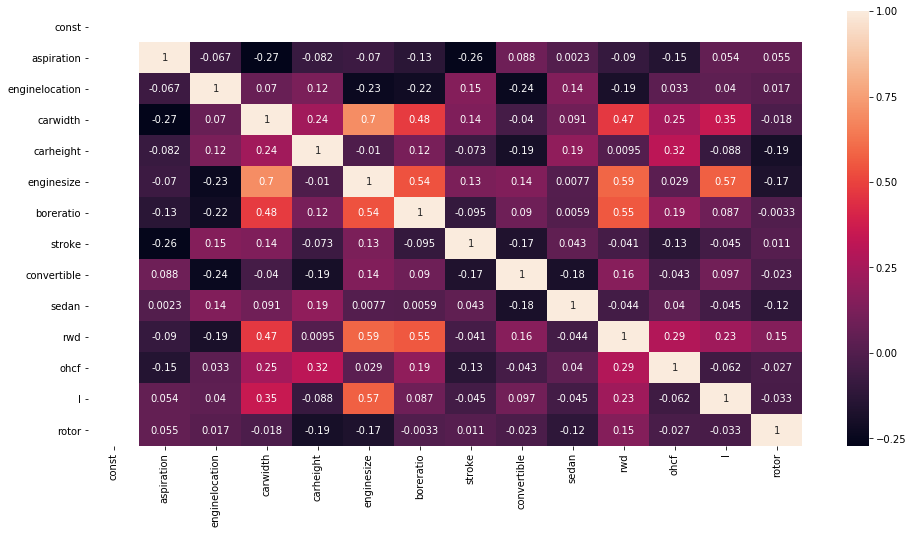

In [359]:
plt.figure(figsize=(16,8))
sns.heatmap(X_train_withoutcar_scaled_sm.corr(),annot=True)

In [360]:
## test to remove carwidth or enginesize

In [361]:
X_train_withoutcar_scaled1=X_train_withoutcar_scaled.drop(['enginesize'],axis=1)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled1)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     62.56
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.39e-48
Time:                        21:31:01   Log-Likelihood:                -1351.9
No. Observations:                 143   AIC:                             2730.
Df Residuals:                     130   BIC:                             2768.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.122e+04   2759.207      7.691      0.000    1.58e+04    2.67e+04
aspiration      -316.2042    779.106     -0.406      0.686   -1857.572    1225.164
enginelocation -2.046e+04   2065.336     -9.904      0.000   -2.45e+04   -1.64e+04
carwidth        2.469e+04   1866.733     13.224      0.000     2.1e+04    2.84e+04
carheight       1642.7868   1478.517      1.111      0.269   -1282.282    4567.856
boreratio      -1305.8328   1849.714     -0.706      0.481   -4965.271    2353.605
stroke           123.0491   1995.268      0.062      0.951   -3824.350    4070.448
convertible     4967.8578   1596.938      3.111      0.002    1808.507    8127.208
sedan           1159.3546    566.204      2.048      0.043      39.189    2279.521
rwd             4995.0793    758.383      6.586      0.000    3494.709    6495.450
ohcf           -6654.9350   1433.823     -4.641      0.000   -9491.582   -3818.288
l               3510.2566   1217.935      2.882      0.005    1100.718    5919.795
rotor          -1896.3909   2429.344     -0.781      0.436   -6702.557    2909.775
==============================================================================
Omnibus:                       41.000   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.904
Skew:                           1.132   Prob(JB):                     6.11e-24
Kurtosis:                       6.579   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,103.80
3,carwidth,2.00
9,rwd,1.86
5,boreratio,1.75
4,carheight,1.33
11,l,1.32
10,ohcf,1.30
6,stroke,1.22
1,aspiration,1.19
2,enginelocation,1.19


In [363]:
#r2 score has decreased to 0.85 and few other variables became insignificant

In [364]:
X_train_withoutcar_scaled1=X_train_withoutcar_scaled.drop(['carwidth'],axis=1)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled1)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     84.56
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.61e-55
Time:                        21:31:01   Log-Likelihood:                -1333.2
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     130   BIC:                             2731.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.636e+04   2415.865      6.772      0.000    1.16e+04    2.11e+04
aspiration     -2816.5444    670.221     -4.202      0.000   -4142.496   -1490.593
enginelocation -9226.9282   1861.921     -4.956      0.000   -1.29e+04   -5543.340
carheight       5623.0813   1266.727      4.439      0.000    3117.014    8129.149
enginesize      4.699e+04   2879.785     16.316      0.000    4.13e+04    5.27e+04
boreratio      -5248.3844   1700.947     -3.086      0.002   -8613.504   -1883.264
stroke         -5736.2902   1844.241     -3.110      0.002   -9384.900   -2087.681
convertible     3787.2266   1400.467      2.704      0.008    1016.571    6557.882
sedan           1171.9613    496.426      2.361      0.020     189.841    2154.081
rwd             1946.9317    723.992      2.689      0.008     514.599    3379.264
ohcf           -2271.2465   1259.860     -1.803      0.074   -4763.729     221.236
l              -4283.7457   1307.036     -3.277      0.001   -6869.561   -1697.931
rotor           1.139e+04   2273.355      5.008      0.000    6887.864    1.59e+04
==============================================================================
Omnibus:                        4.840   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                6.204
Skew:                           0.132   Prob(JB):                       0.0450
Kurtosis:                       3.986   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [365]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,103.41
4,enginesize,3.79
9,rwd,2.20
11,l,1.97
5,boreratio,1.92
6,stroke,1.35
10,ohcf,1.31
3,carheight,1.27
2,enginelocation,1.26
12,rotor,1.26


In [366]:
#r2 score has decreased to 0.886

In [367]:
#so removing carwidth instead of enginesize

In [368]:
X_train_withoutcar_scaled.drop(['carwidth'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     84.56
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.61e-55
Time:                        21:31:02   Log-Likelihood:                -1333.2
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     130   BIC:                             2731.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.636e+04   2415.865      6.772      0.000    1.16e+04    2.11e+04
aspiration     -2816.5444    670.221     -4.202      0.000   -4142.496   -1490.593
enginelocation -9226.9282   1861.921     -4.956      0.000   -1.29e+04   -5543.340
carheight       5623.0813   1266.727      4.439      0.000    3117.014    8129.149
enginesize      4.699e+04   2879.785     16.316      0.000    4.13e+04    5.27e+04
boreratio      -5248.3844   1700.947     -3.086      0.002   -8613.504   -1883.264
stroke         -5736.2902   1844.241     -3.110      0.002   -9384.900   -2087.681
convertible     3787.2266   1400.467      2.704      0.008    1016.571    6557.882
sedan           1171.9613    496.426      2.361      0.020     189.841    2154.081
rwd             1946.9317    723.992      2.689      0.008     514.599    3379.264
ohcf           -2271.2465   1259.860     -1.803      0.074   -4763.729     221.236
l              -4283.7457   1307.036     -3.277      0.001   -6869.561   -1697.931
rotor           1.139e+04   2273.355      5.008      0.000    6887.864    1.59e+04
==============================================================================
Omnibus:                        4.840   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                6.204
Skew:                           0.132   Prob(JB):                       0.0450
Kurtosis:                       3.986   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [369]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,103.41
4,enginesize,3.79
9,rwd,2.20
11,l,1.97
5,boreratio,1.92
6,stroke,1.35
10,ohcf,1.31
3,carheight,1.27
2,enginelocation,1.26
12,rotor,1.26


In [370]:
#so removing ohcf because of high p value

In [371]:
X_train_withoutcar_scaled.drop(['ohcf'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     90.40
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.31e-55
Time:                        21:31:03   Log-Likelihood:                -1335.0
No. Observations:                 143   AIC:                             2694.
Df Residuals:                     131   BIC:                             2730.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.641e+04   2436.351      6.737      0.000    1.16e+04    2.12e+04
aspiration     -2659.8332    670.242     -3.968      0.000   -3985.732   -1333.934
enginelocation -9354.7453   1876.481     -4.985      0.000   -1.31e+04   -5642.618
carheight       4998.7706   1228.890      4.068      0.000    2567.734    7429.808
enginesize       4.76e+04   2884.054     16.505      0.000    4.19e+04    5.33e+04
boreratio      -5332.8229   1714.842     -3.110      0.002   -8725.189   -1940.457
stroke         -5391.3003   1849.971     -2.914      0.004   -9050.983   -1731.617
convertible     3860.9351   1411.840      2.735      0.007    1067.978    6653.892
sedan           1177.2473    500.663      2.351      0.020     186.817    2167.677
rwd             1550.2577    695.644      2.229      0.028     174.107    2926.408
l              -4250.3967   1318.081     -3.225      0.002   -6857.875   -1642.918
rotor           1.165e+04   2288.087      5.091      0.000    7121.537    1.62e+04
==============================================================================
Omnibus:                        5.977   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                9.185
Skew:                           0.092   Prob(JB):                       0.0101
Kurtosis:                       4.228   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [372]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,103.40
4,enginesize,3.74
9,rwd,2.00
10,l,1.97
5,boreratio,1.92
6,stroke,1.34
2,enginelocation,1.26
11,rotor,1.26
3,carheight,1.17
7,convertible,1.17


In [373]:
X_train_withoutcar_scaled_sm.columns

Index(['const', 'aspiration', 'enginelocation', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'convertible', 'sedan', 'rwd', 'l', 'rotor'],
      dtype='object')

In [374]:
Model_features_withoutcar=['aspiration', 'enginelocation', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'convertible', 'sedan', 'rwd', 'l', 'rotor']

## Residual Analysis

In [375]:
#predict the values using training data
y_train_withoutcar_predict=model_withoutcar.predict(X_train_withoutcar_scaled_sm)

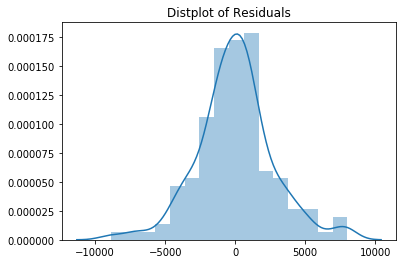

In [376]:
#residual plot to check whether error terms are normal distributed
plt.title("Distplot of Residuals")
sns.distplot(y_train_withoutcar-y_train_withoutcar_predict)

In [377]:
# error terms are normally distributed so model seems significant

Text(0, 0.5, 'predicted values')

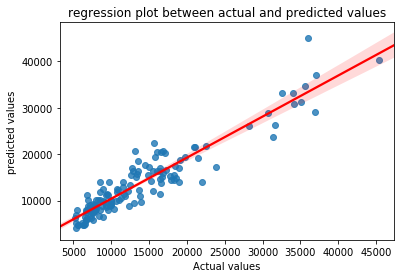

In [378]:
plt.title("regression plot between actual and predicted values")
sns.regplot(y_train_withoutcar,y_train_withoutcar_predict,line_kws={'color':'red'})
plt.xlabel('Actual values')
plt.ylabel("predicted values")

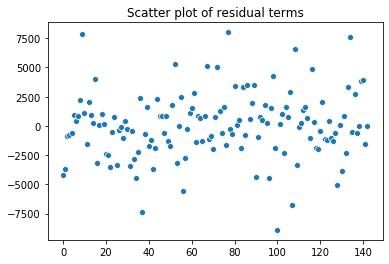

In [379]:
#to check the whether there is any correlation or patterns in error terms
plt.title("Scatter plot of residual terms")
sns.scatterplot(np.arange(0,143),y_train_withoutcar-y_train_withoutcar_predict)

In [380]:
#no patterns observed in the error terms

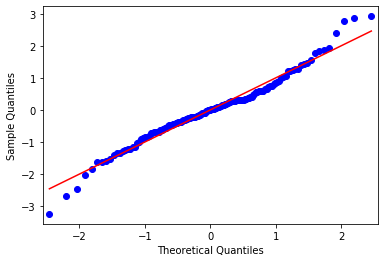

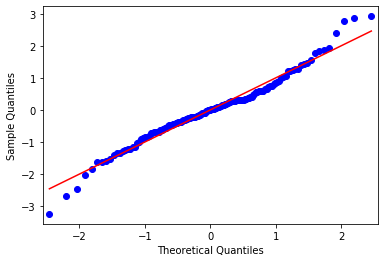

In [381]:
#Q-Q plot
sm.qqplot(model_withoutcar.resid,line='s',fit=True)

In [382]:
# Q-Q plot show the given residual are distributed normally as it resembels with y=x line

In [383]:
X_test_withoutcar_scaled_sm=X_test_withoutcar_scaled[Model_features_withoutcar]

In [384]:
X_test_withoutcar_scaled_sm.shape

(62, 11)

In [385]:
X_test_withoutcar_scaled_sm=sm.add_constant(X_test_withoutcar_scaled_sm,has_constant='add')

In [386]:
y_test_withoutcar_predict=model_withoutcar.predict(X_test_withoutcar_scaled_sm)

In [387]:
r2_score(y_test_withoutcar,y_test_withoutcar_predict)

0.8659453898300584

In [388]:
model_withoutcar.params

const             16413.054968
aspiration        -2659.833183
enginelocation    -9354.745306
carheight          4998.770554
enginesize        47600.384962
boreratio         -5332.822875
stroke            -5391.300269
convertible        3860.935062
sedan              1177.247276
rwd                1550.257672
l                 -4250.396667
rotor             11647.919755
dtype: float64

In [389]:
model.params

const             14957.654662
enginelocation   -14067.899796
carwidth          16654.067906
enginesize        15485.140392
peakrpm            3014.279306
convertible        2371.624995
alfa-romero        3520.595517
bmw                9812.082458
buick              8547.856429
jaguar             7400.100185
mitsubishi        -1584.687978
porsche            4050.606691
dtype: float64

## Derving variables using model with carname and without carname

#### Inferences

- Order of prices of car based on company names
    - bmw > buick > jaguar > porsche > alfa-romero 

- Enginesize 
    - As engine size increase price of the car is increasing

- Dimensions of the car also increases the price of car
    - car height, car width

- Front engine located cars has lower price compared to rear location engined cars in market

- Aspiration(std) has low price compared to turbo aspirations.
    
    
- Boreratio and stoke also has negative impact on price.
    - As they increase, the price decreases

- Drivewheel rwd having good price in market

- rotor engine typed car have good price than l engine typed cars

- Peakrpm also drives the price of car.